In this notebook we will make a summary of the results thus far. We start by replicating the results from in the paper for trine measurement where we make use equation A10, which is equivalent to integrating over the Haar measure.

In [1]:
import sympy as sp
import numpy as np
from sympy.matrices import Matrix
from sympy.physics.quantum import TensorProduct, Dagger
import matplotlib.pyplot as plt

from core import POVMProtocolCalculator
from utils import eigen_value_measure_mathematica, cyclic_symmetry, number_to_base, optimal_eig_new_measure, \
optimal_eig_old_measure, simplified_root_mean_square_measure_old_with_z, simplified_root_mean_square_measure_old_without_z, \
simplified_root_mean_square_measure_new, plot_protocol, eigen_value_measure_new_mathematica

In [2]:
phi0 = Matrix([1, 0])
phi1 = Matrix([sp.nsimplify(1/2), sp.nsimplify(sp.sqrt(3)/2)])
phi2 = Matrix([sp.nsimplify(1/2), sp.nsimplify(-sp.sqrt(3)/2)])

M0 = sp.nsimplify(2 / 3) * phi0 * Dagger(phi0)
M1 = sp.nsimplify(2 / 3) * phi1 * Dagger(phi1)
M2 = sp.nsimplify(2 / 3) * phi2 * Dagger(phi2)

povm_trine = POVMProtocolCalculator(2, M0, M1, M2)

In [3]:
povm_trine.calculate_measures_sympy(simplified_root_mean_square_measure_old_with_z)

Calculating 512 measures...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 512/512 [00:02<00:00, 215.63it/s]

Done!


In [4]:
povm_trine.lowest_measures

[ProtocolResult(protocol=frozenset({(0, 1), (0, 2), (0, 0), (1, 0), (2, 0)}), measure_function='simplified_root_mean_square_measure_old_with_z', measure_value=0.0641500299099585)]

As expected there is one lowest measure which is the same as the result from the paper {(0, 1), (0, 2), (0, 0), (1, 0), (2, 0)} and the measure has a value of $ \epsilon = \frac{1}{9\sqrt{3}} \approx 0.064 $.

We can check that this is still the same protocol if we remove the $ |z|^2 $ from equation A10 to get equation A11  

In [5]:
povm_trine.calculate_measures_sympy(simplified_root_mean_square_measure_old_without_z)

Calculating 512 measures...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 512/512 [00:00<00:00, 2013.23it/s]

Done!


In [6]:
povm_trine.lowest_measures

[ProtocolResult(protocol=frozenset({(0, 1), (0, 2), (0, 0), (1, 0), (2, 0)}), measure_function='simplified_root_mean_square_measure_old_without_z', measure_value=0.0641500299099585)]

Since this protocol doesn't have any complex components the measure is the same as before $ \epsilon = 0.064 $

We now use the optimisation procedure laid out in section B to see if we can improve on the above

In [3]:
povm_trine.calculate_measures_mathematica()

Calculating 512 measures...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 512/512 [00:06<00:00, 77.78it/s]


Done!


In [4]:
povm_trine.lowest_measures

[EigenValueProtocolResult(protocol=frozenset({(0, 1), (1, 0), (1, 1), (0, 0)}), measure_function='eigen_value_measure_mathematica_optimal_eig_old_measure', measure_value=0.05555555555555555, eigen_values=(1.0, 0.3333333333333333, 0.3333333333333333, 0.1111111111111111), x_star_y_star=(0.9444444444444444, 0.1111111111111111)),
 EigenValueProtocolResult(protocol=frozenset({(0, 1), (2, 0), (2, 1), (0, 0)}), measure_function='eigen_value_measure_mathematica_optimal_eig_old_measure', measure_value=0.05555555555555555, eigen_values=(1.0, 0.3333333333333333, 0.3333333333333333, 0.1111111111111111), x_star_y_star=(0.9444444444444444, 0.1111111111111111)),
 EigenValueProtocolResult(protocol=frozenset({(1, 0), (0, 2), (1, 2), (0, 0)}), measure_function='eigen_value_measure_mathematica_optimal_eig_old_measure', measure_value=0.05555555555555555, eigen_values=(1.0, 0.3333333333333333, 0.3333333333333333, 0.1111111111111111), x_star_y_star=(0.9444444444444444, 0.1111111111111111)),
 EigenValueProto

In [5]:
povm_trine.protocols[frozenset({(0, 1), (0, 2), (0, 0), (1, 0), (2, 0)})]

EigenValueProtocolResult(protocol=frozenset({(0, 1), (0, 2), (0, 0), (1, 0), (2, 0)}), measure_function='eigen_value_measure_mathematica_optimal_eig_old_measure', measure_value=0.05555555555555558, eigen_values=(0.8888888888888888, 0.6666666666666666, 0.6666666666666666, 0), x_star_y_star=(0.8888888888888888, 0.05555555555555558))

The above results are unexpected as we are getting the compliment of the row-column protocols however if we check the measure value for the row column protocols we find that they are earily close to the lowest measure. (Previously I had a bug in my code which meant the compliment protocols now displayed were calculated wrong and therefore weren't displayed. I had put (x, y) = ((1 - eig_min)/2, eig_min) instead of (x, y) = (1 - eig_min/2, eig_min) for the final inequality in equation 25.) Further analysis using the exact fractions instead of the rounded decimals shows that they should be the same value of 1/18. Clearly using rounded decimals is going to be an issue so I will rewrite the code to use fractions up until the final output.

Bug now fixed, lets see what result we get

In [3]:
povm_trine.calculate_measures_mathematica()

Calculating 512 measures...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 512/512 [00:16<00:00, 31.50it/s]


Done!


In [8]:
povm_trine.lowest_measures

[EigenValueProtocolResult(protocol=frozenset({(0, 1), (1, 0), (1, 1), (0, 0)}), measure_function='eigen_value_measure_mathematica_optimal_eig_old_measure', measure_value=1/18, eigen_values=[1, 1/3, 1/3, 1/9], x_star_y_star=(17/18, 1/9)),
 EigenValueProtocolResult(protocol=frozenset({(0, 2), (1, 2), (2, 1), (2, 2), (2, 0)}), measure_function='eigen_value_measure_mathematica_optimal_eig_old_measure', measure_value=1/18, eigen_values=[8/9, 2/3, 2/3, 0], x_star_y_star=(8/9, 1/18)),
 EigenValueProtocolResult(protocol=frozenset({(0, 1), (2, 0), (2, 1), (0, 0)}), measure_function='eigen_value_measure_mathematica_optimal_eig_old_measure', measure_value=1/18, eigen_values=[1, 1/3, 1/3, 1/9], x_star_y_star=(17/18, 1/9)),
 EigenValueProtocolResult(protocol=frozenset({(0, 2), (1, 2), (2, 2), (1, 0), (1, 1)}), measure_function='eigen_value_measure_mathematica_optimal_eig_old_measure', measure_value=1/18, eigen_values=[8/9, 2/3, 2/3, 0], x_star_y_star=(8/9, 1/18)),
 EigenValueProtocolResult(protocol

Interesting new results! Not only do we find that the column-row protocols are optimal but so are their compliments. I think this makes sense as if a protocol is optimal for finding zero then it's compliment is optimal for finding one, in which case we can perform a X gate to swap these around.

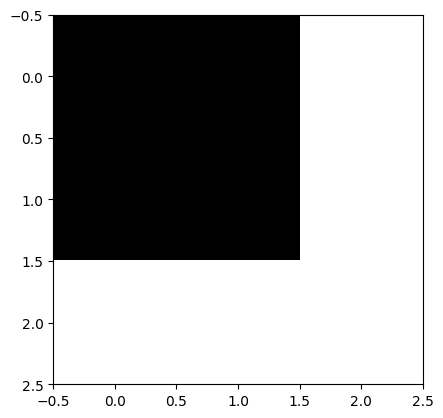

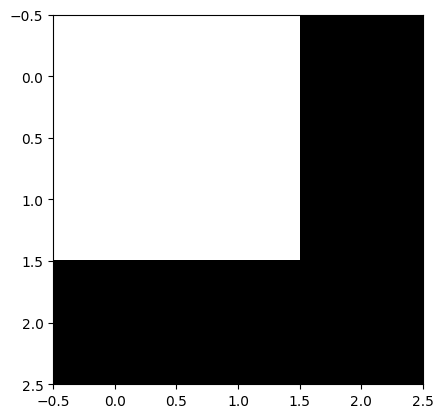

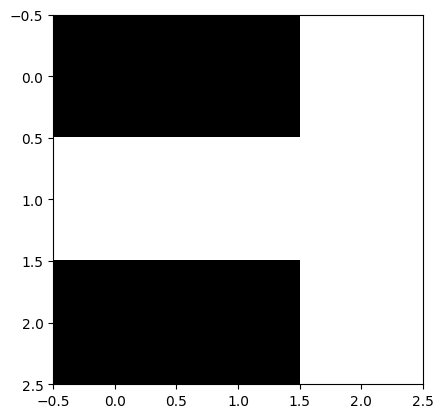

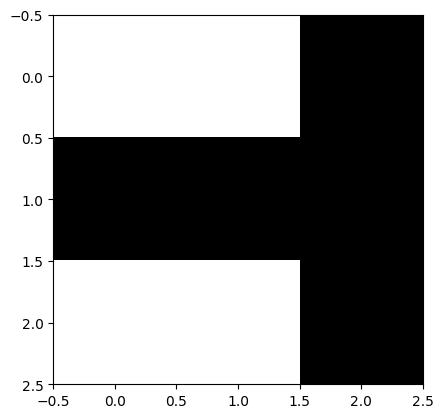

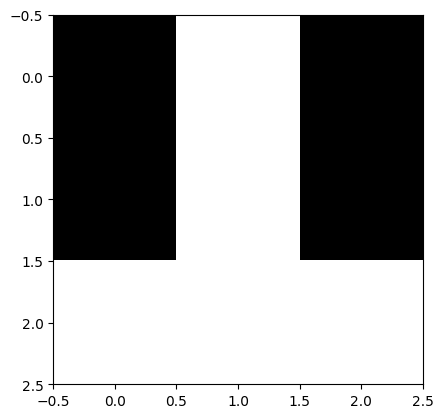

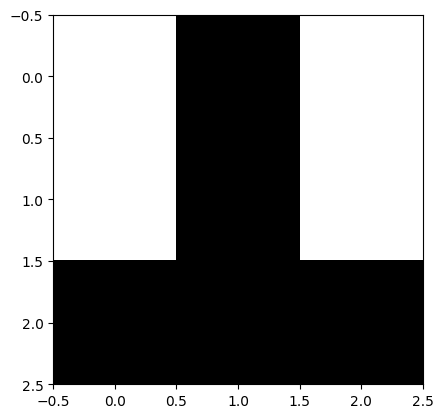

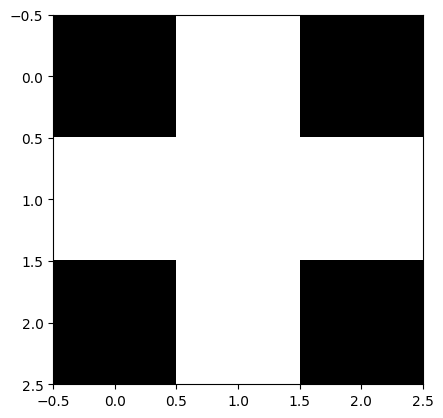

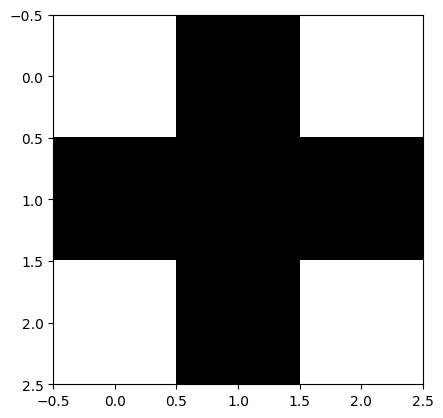

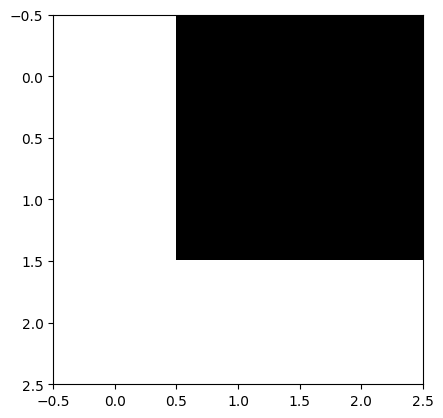

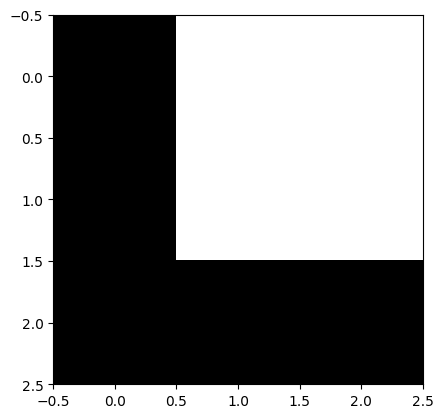

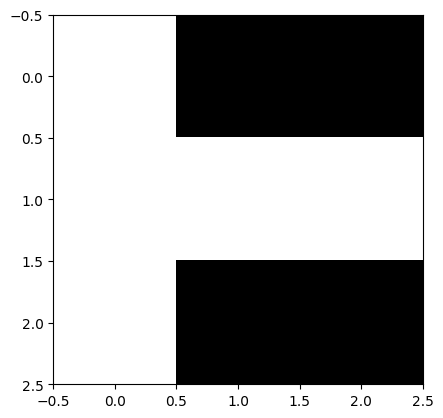

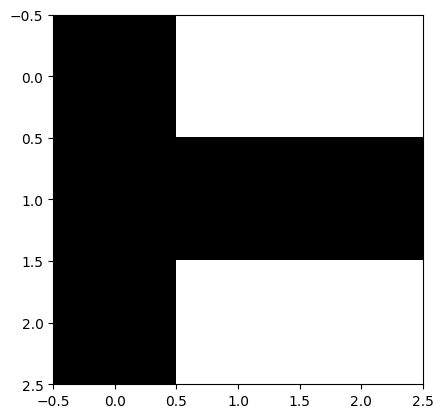

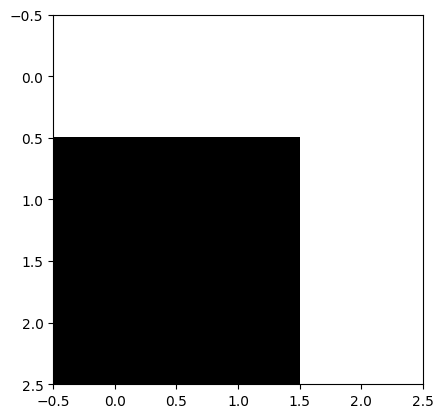

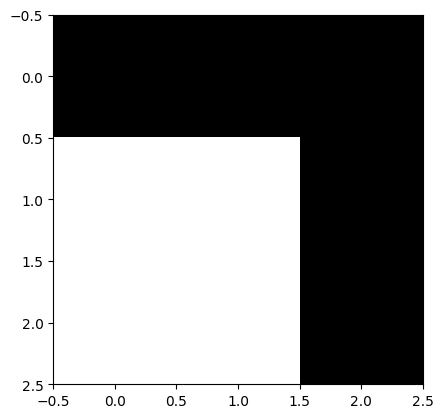

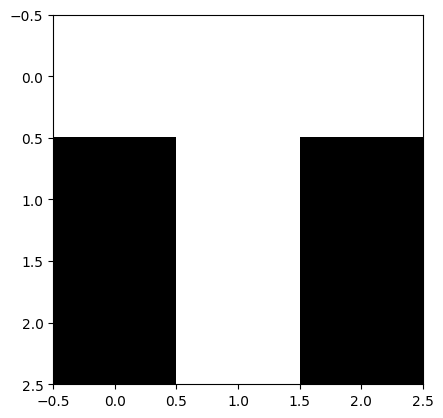

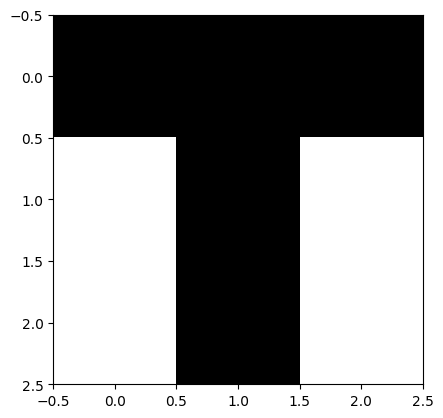

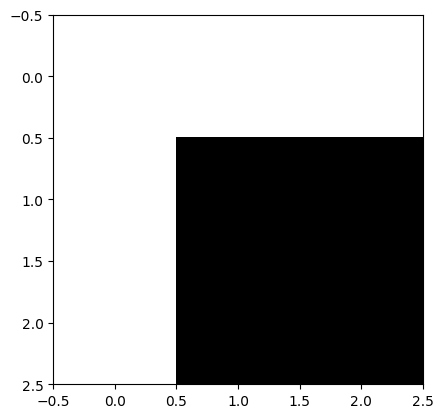

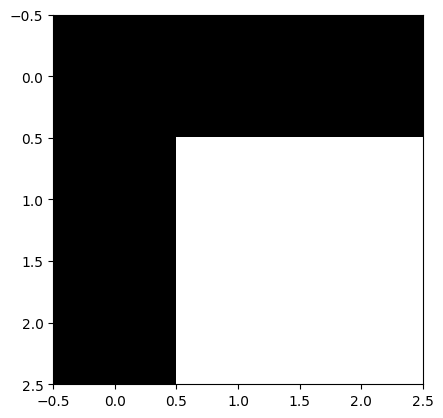

In [9]:
for protocol in povm_trine.lowest_measures:
    plot_protocol(protocol.protocol, (3,3))
    
    plt.show()

Let's see if using the new measure of goodness makes a difference to the most ideal protocol

In [3]:
povm_trine.calculate_measures_mathematica(eigen_value_measure_new_mathematica)

Calculating 512 measures...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 512/512 [00:23<00:00, 21.47it/s]


Done!


In [4]:
povm_trine.lowest_measures

[EigenValueProtocolResult(protocol=frozenset({(0, 1), (1, 0), (1, 1), (0, 0)}), measure_function='eigen_value_measure_new_mathematica_optimal_eig_new_measure', measure_value=-2/9 + 2*sqrt(2)/9, eigen_values=[1, 1/3, 1/3, 1/9], x_star_y_star=(10/9 - sqrt(2)/9, 1/9)),
 EigenValueProtocolResult(protocol=frozenset({(0, 2), (1, 2), (2, 1), (2, 2), (2, 0)}), measure_function='eigen_value_measure_new_mathematica_optimal_eig_new_measure', measure_value=-2/9 + 2*sqrt(2)/9, eigen_values=[8/9, 2/3, 2/3, 0], x_star_y_star=(8/9, -1/9 + sqrt(2)/9)),
 EigenValueProtocolResult(protocol=frozenset({(0, 1), (2, 0), (2, 1), (0, 0)}), measure_function='eigen_value_measure_new_mathematica_optimal_eig_new_measure', measure_value=-2/9 + 2*sqrt(2)/9, eigen_values=[1, 1/3, 1/3, 1/9], x_star_y_star=(10/9 - sqrt(2)/9, 1/9)),
 EigenValueProtocolResult(protocol=frozenset({(0, 2), (1, 2), (2, 2), (1, 0), (1, 1)}), measure_function='eigen_value_measure_new_mathematica_optimal_eig_new_measure', measure_value=-2/9 + 2*

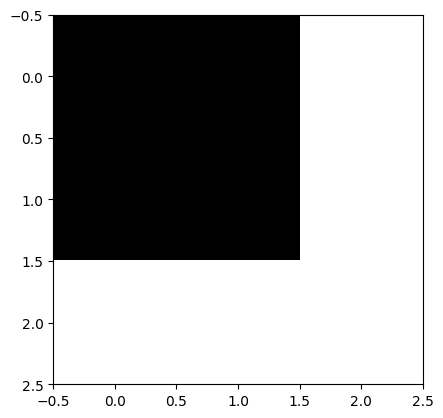

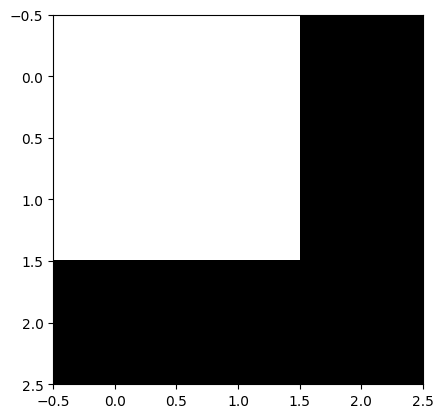

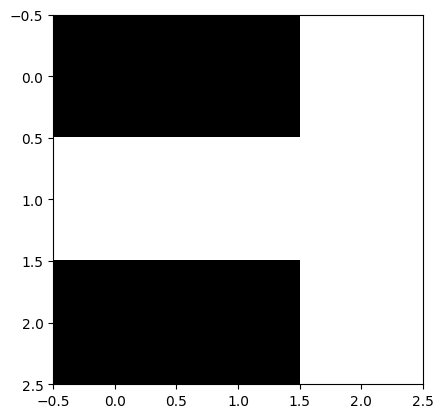

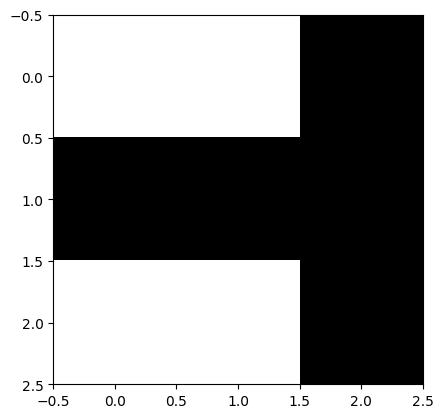

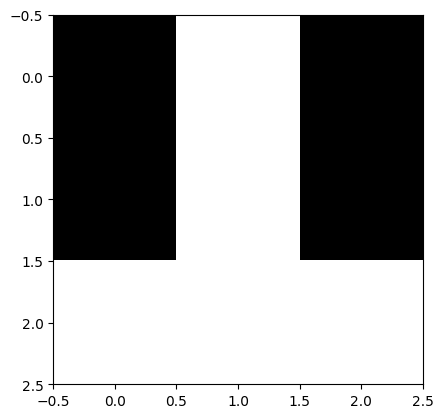

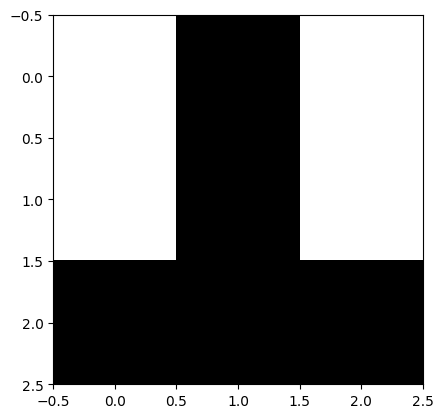

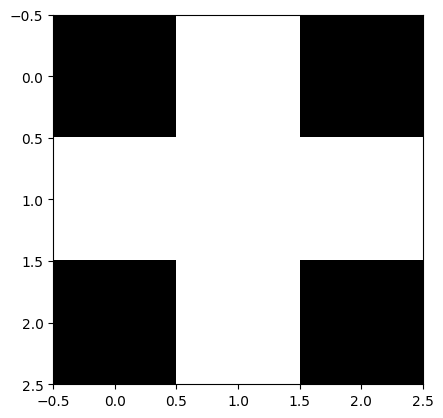

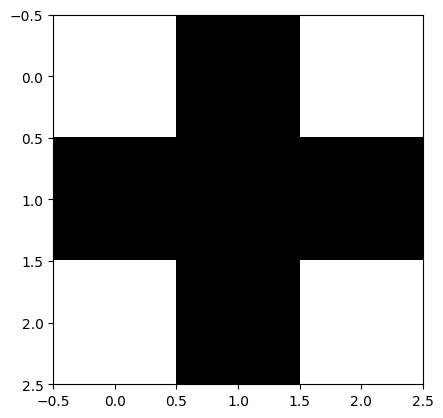

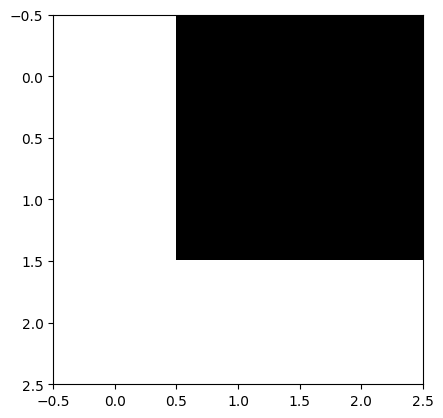

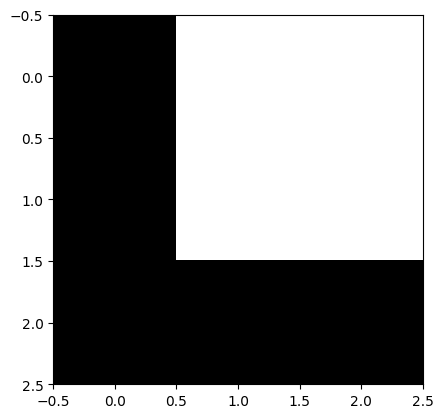

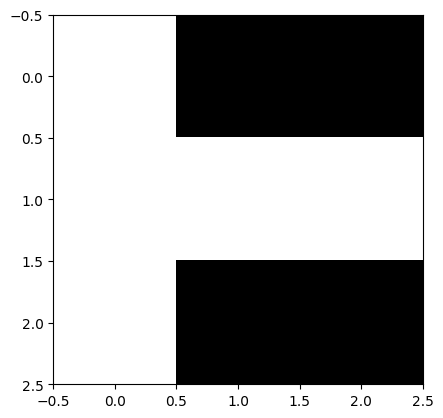

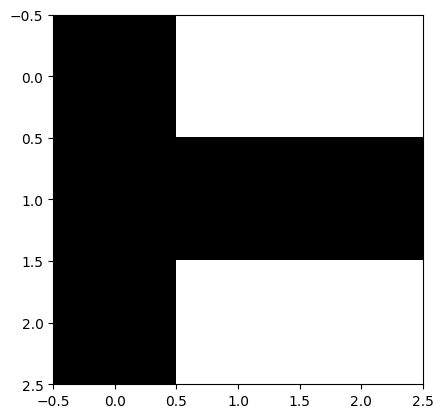

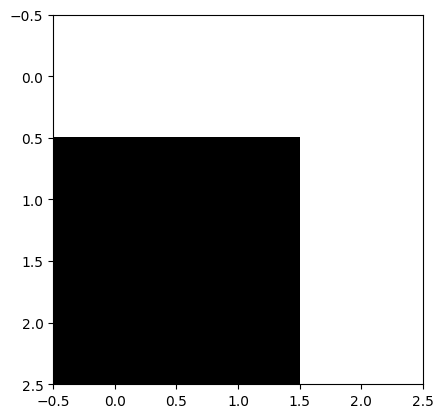

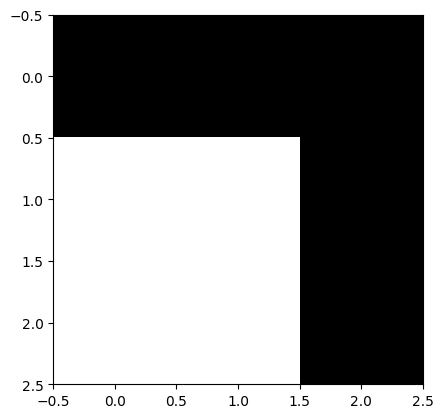

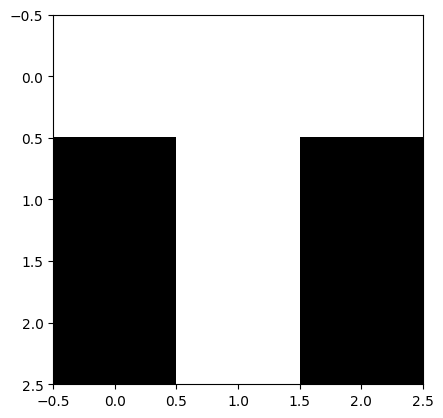

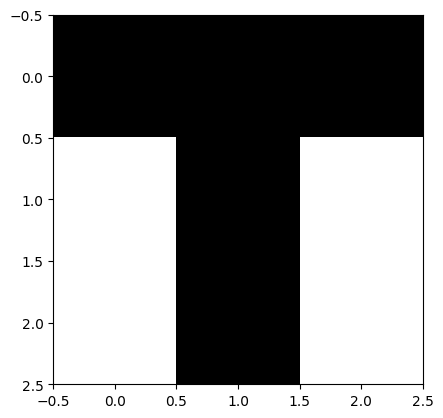

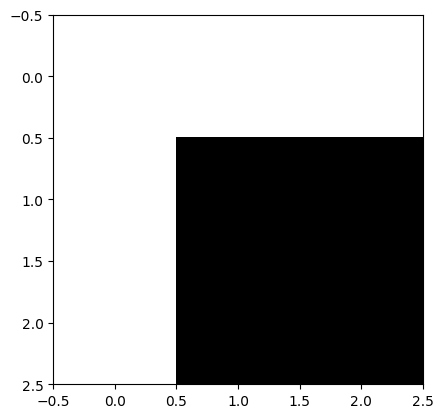

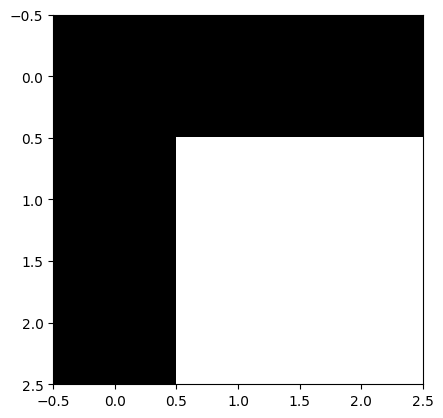

In [5]:
for protocol in povm_trine.lowest_measures:
    plot_protocol(protocol.protocol, (3,3))
    
    plt.show()

Same outcome as before. Moving onto the tetra measurement

In [2]:
phi0 = Matrix([1, 0])
phi1 = Matrix([sp.nsimplify(1/sp.sqrt(3)), sp.nsimplify(sp.sqrt(2/3))])
phi2 = Matrix([sp.nsimplify(1/sp.sqrt(3)), sp.E ** (sp.I * 2 * sp.pi / 3) * sp.nsimplify(sp.sqrt(2/3))])
phi3 = Matrix([sp.nsimplify(1/sp.sqrt(3)), sp.E ** (-sp.I * 2 * sp.pi / 3) * sp.nsimplify(sp.sqrt(2/3))])

M0 = sp.nsimplify(1 / 2) * phi0 * Dagger(phi0)
M1 = sp.nsimplify(1 / 2) * phi1 * Dagger(phi1)
M2 = sp.nsimplify(1 / 2) * phi2 * Dagger(phi2)
M3 = sp.nsimplify(1 / 2) * phi3 * Dagger(phi3)

povm_tetra = POVMProtocolCalculator(2, M0, M1, M2, M3)

In [4]:
povm_tetra.calculate_measures_mathematica()

Calculating 65536 measures...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 65536/65536 [1:30:37<00:00, 12.05it/s]


TypeError: cannot determine truth value of Relational

In [6]:
povm_tetra.save()

In [6]:
povm_tetra = POVMProtocolCalculator.load("2023_07_24-16_00_32-d6428d92-2a32-11ee-acab-a4bb6d9bb15d.txt")

In [8]:
len(povm_tetra.lowest_measures)

144

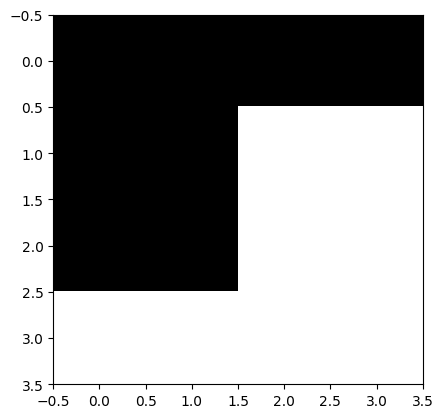

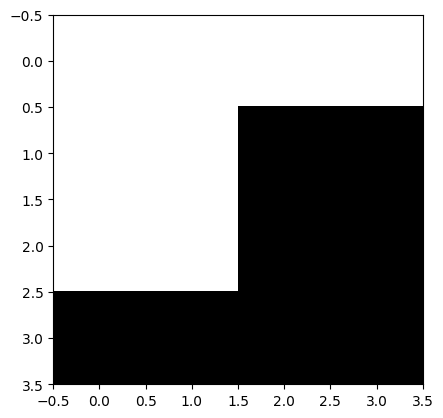

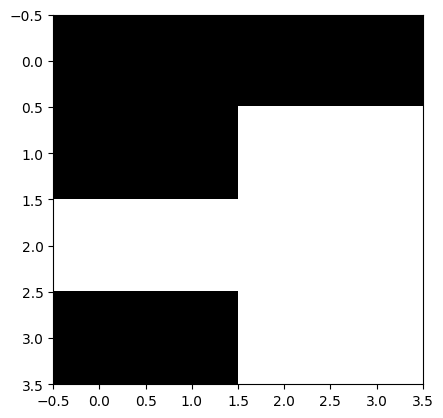

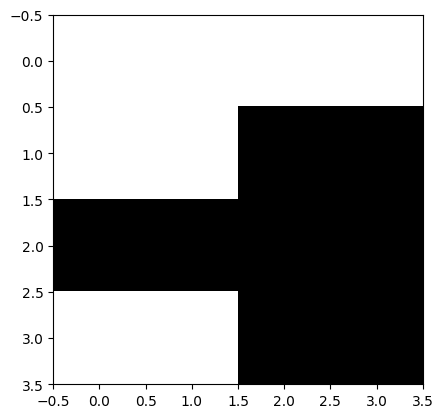

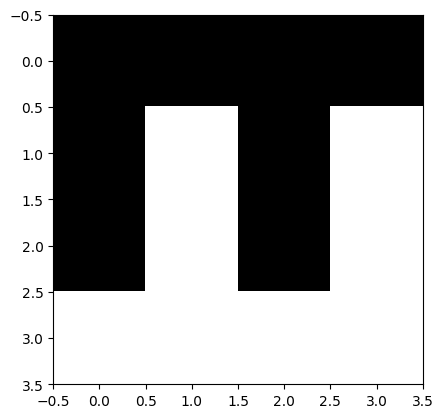

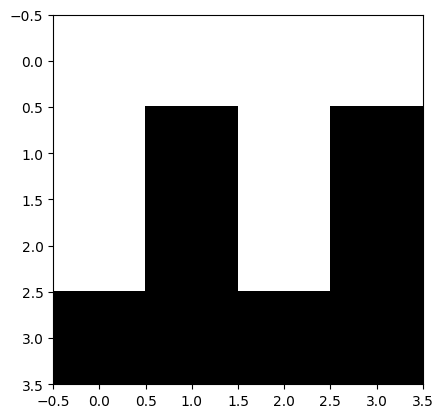

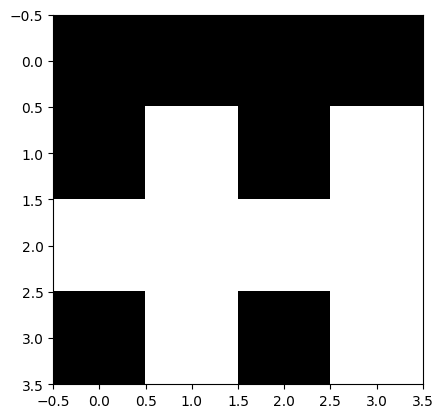

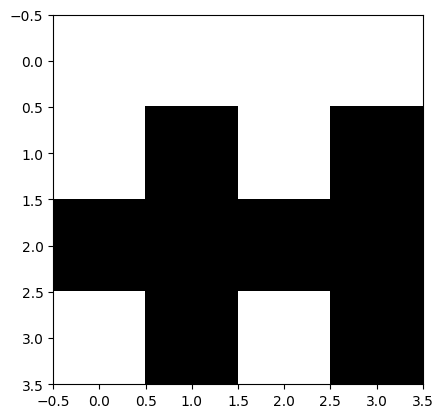

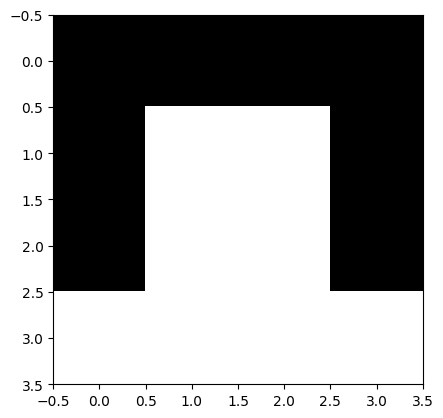

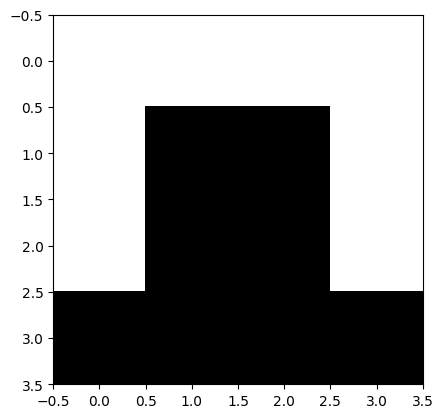

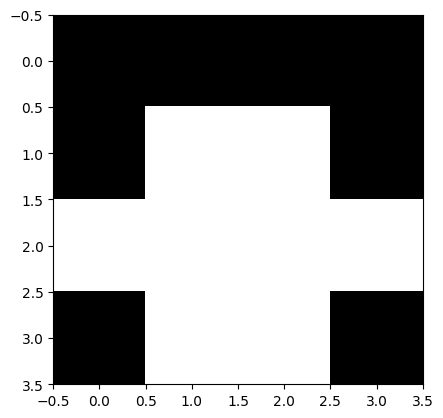

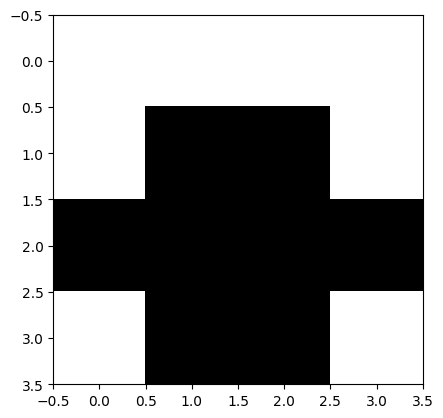

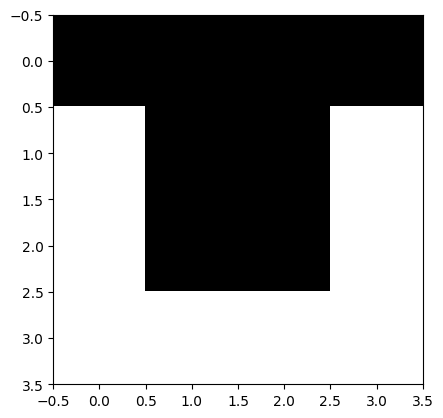

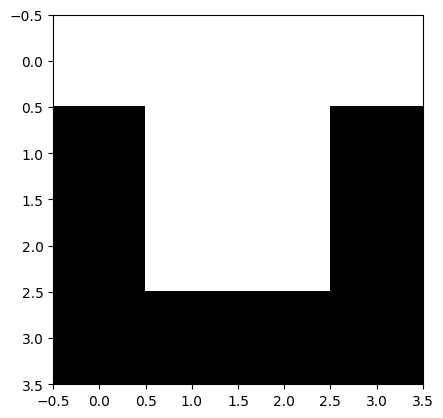

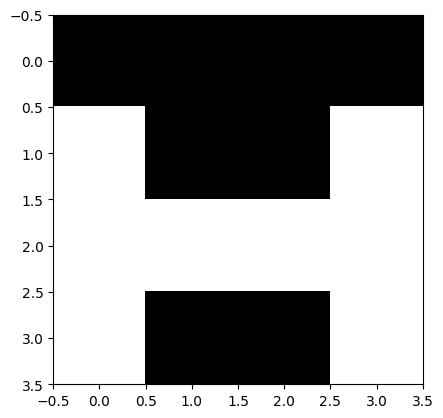

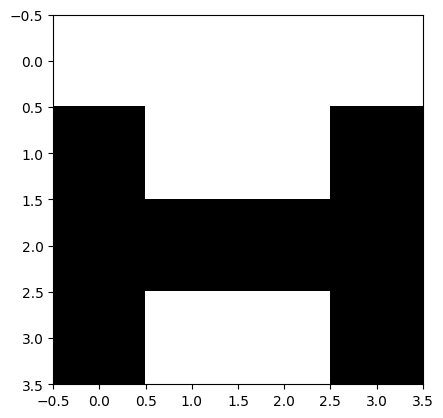

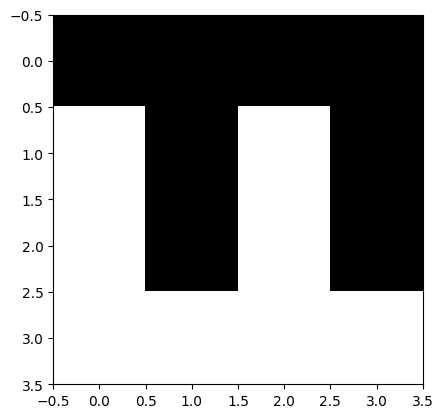

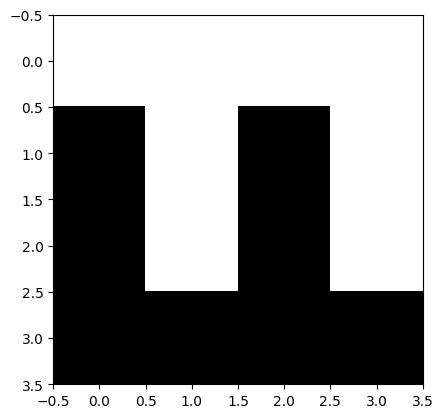

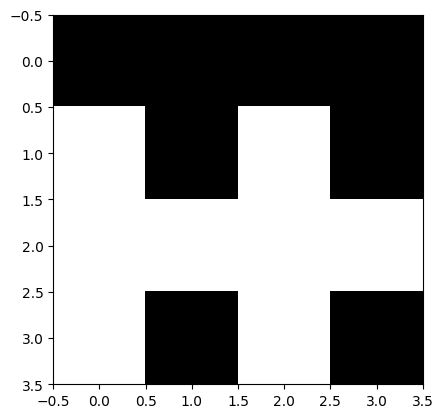

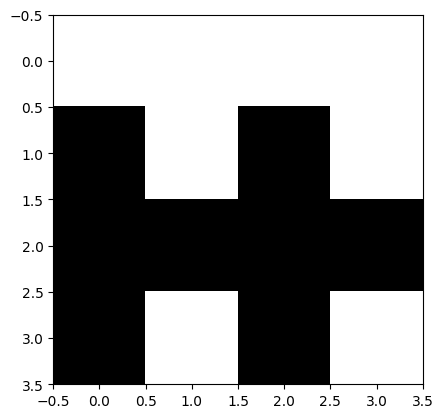

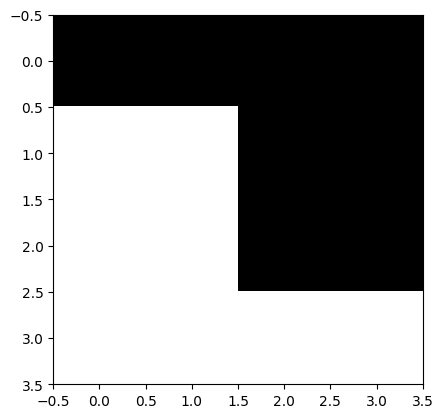

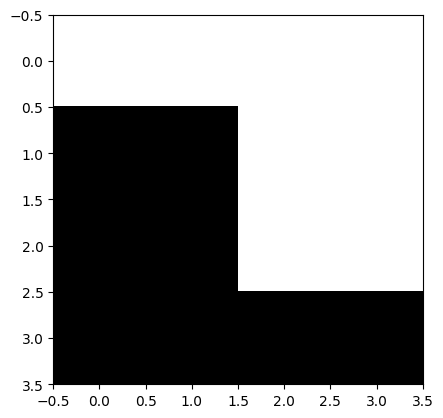

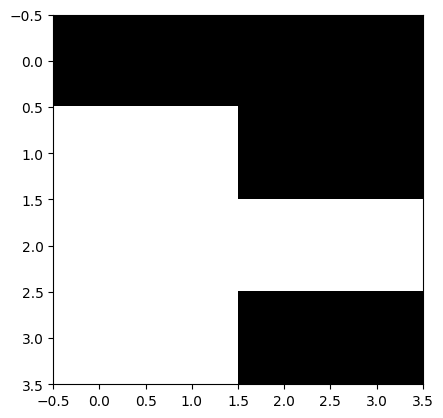

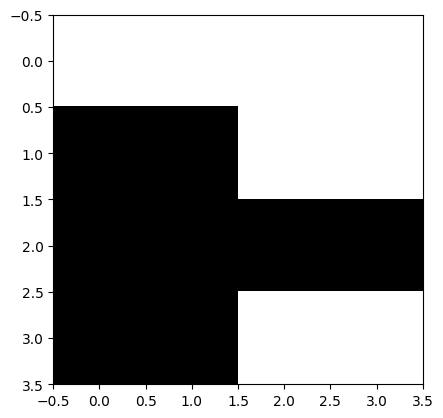

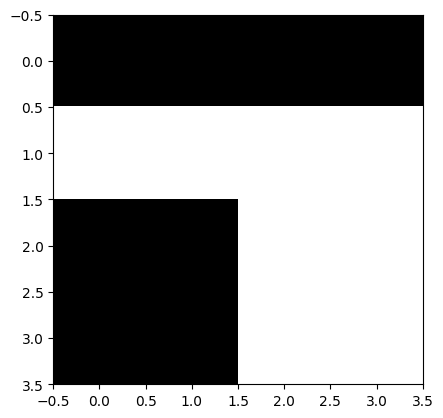

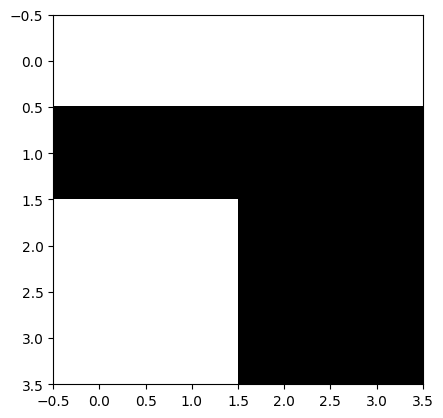

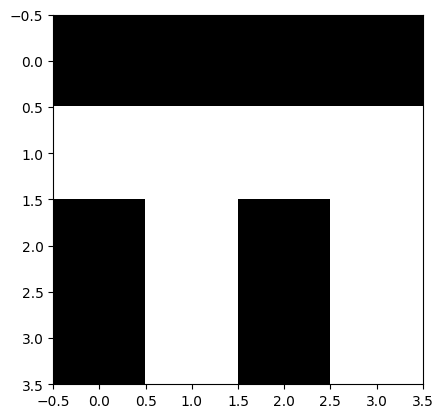

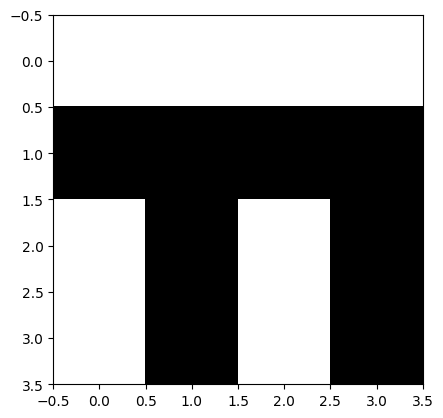

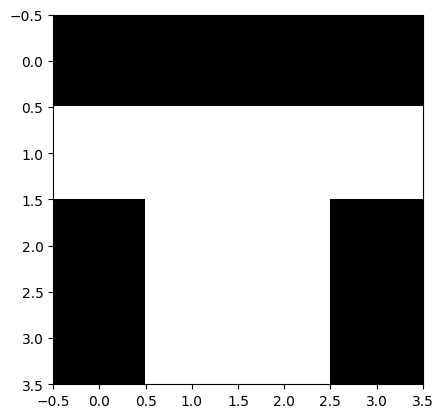

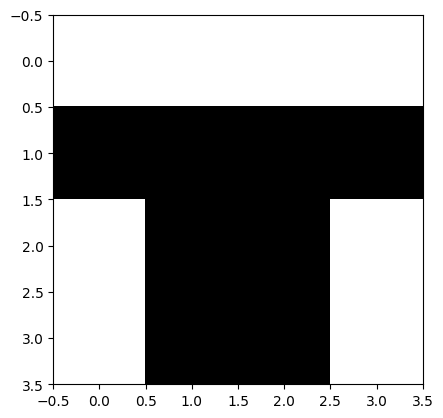

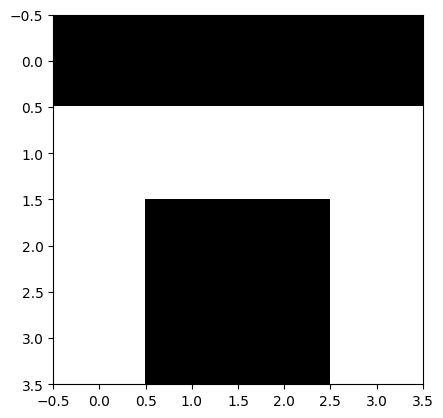

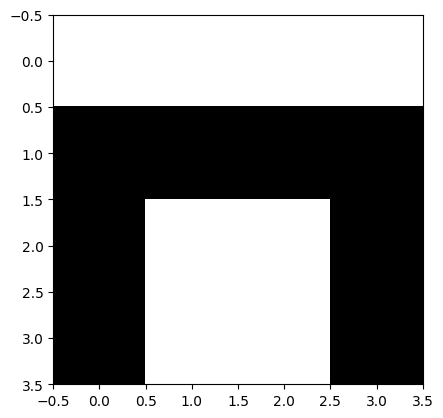

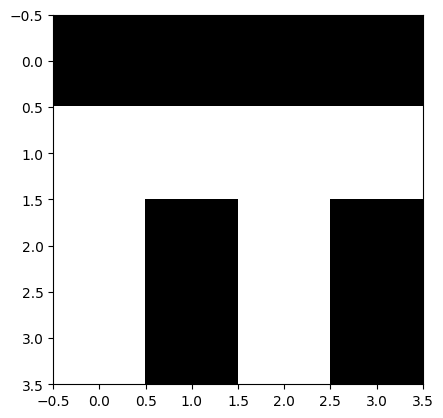

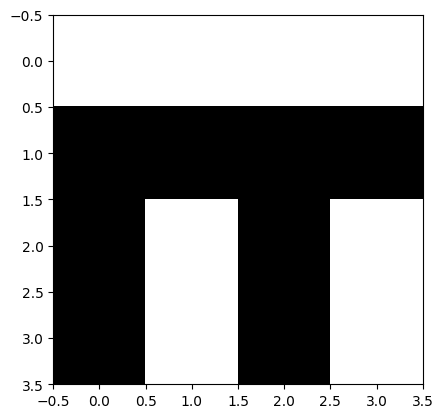

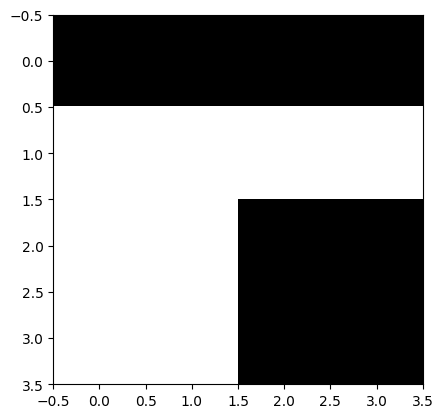

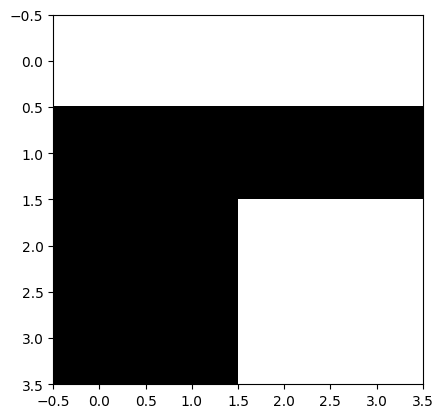

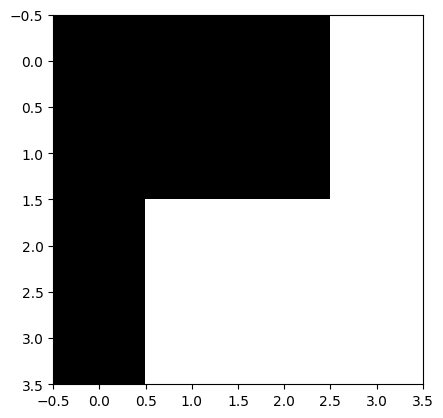

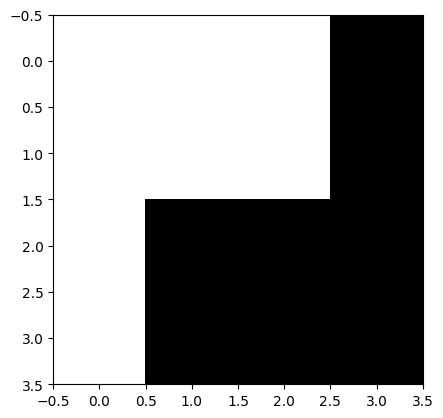

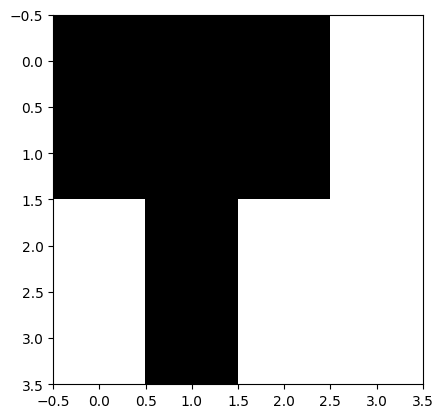

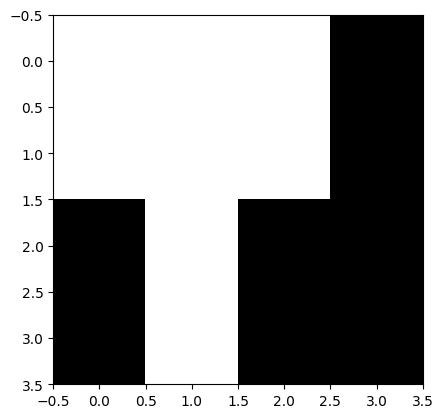

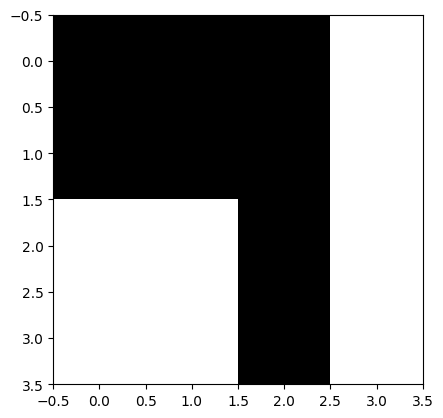

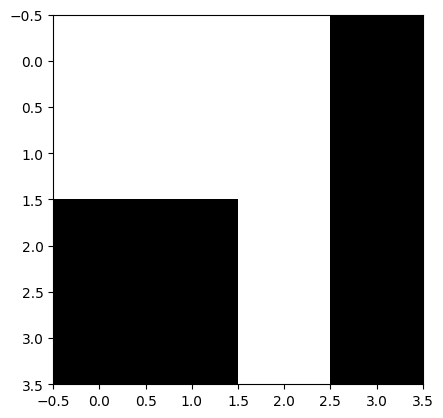

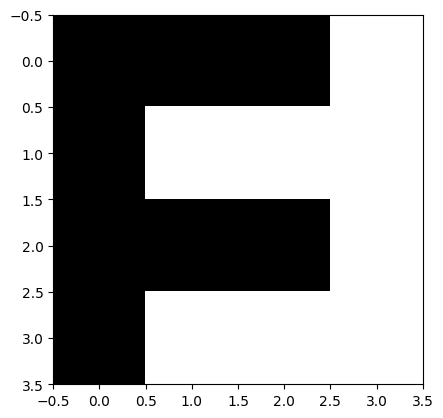

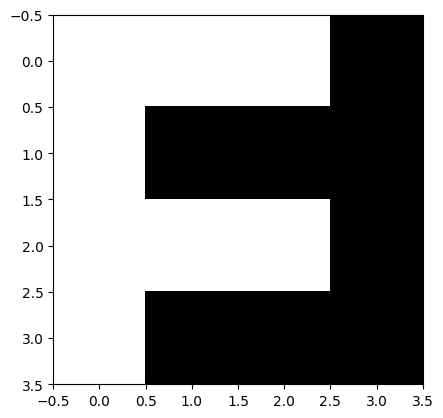

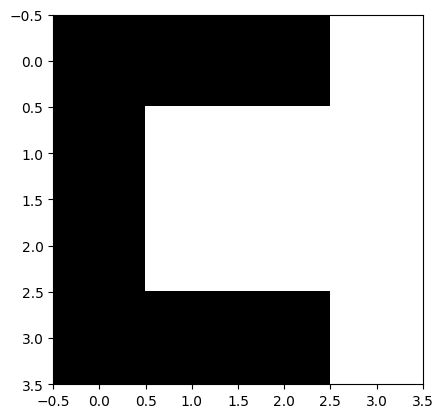

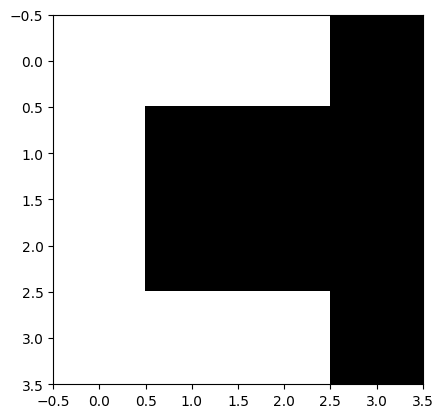

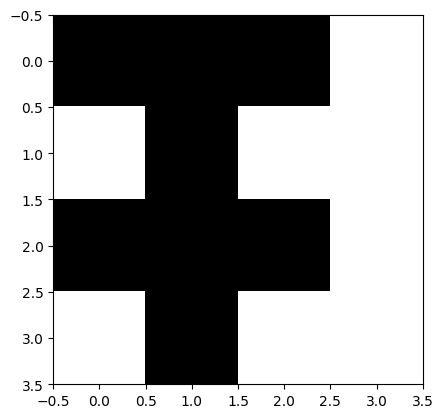

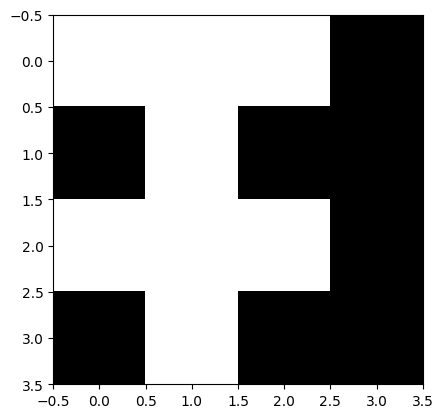

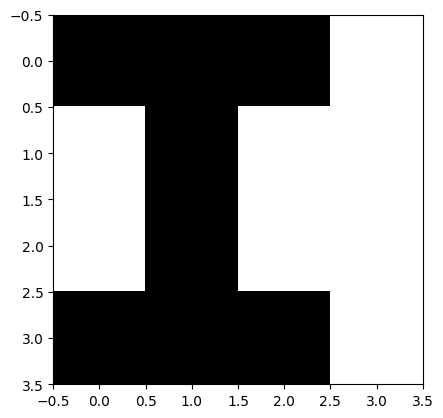

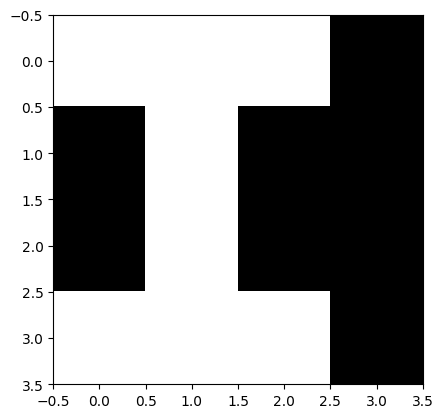

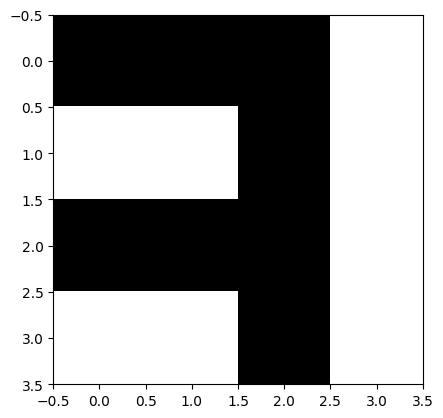

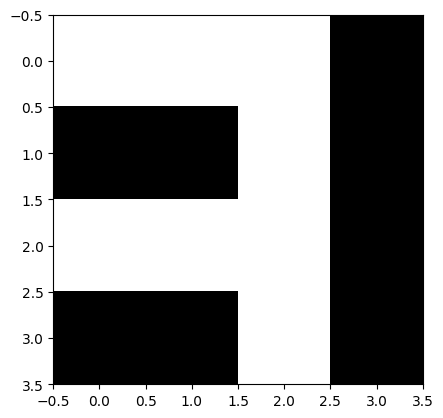

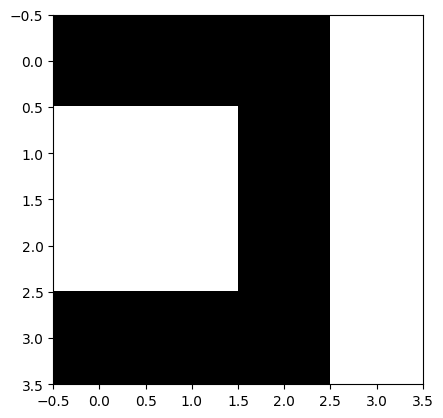

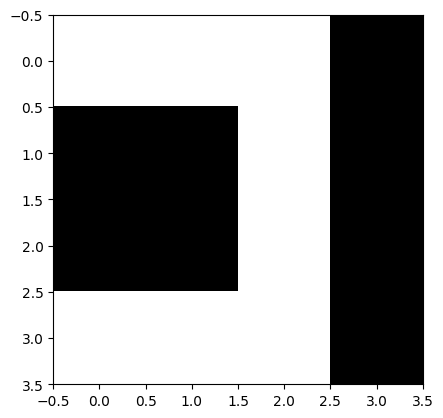

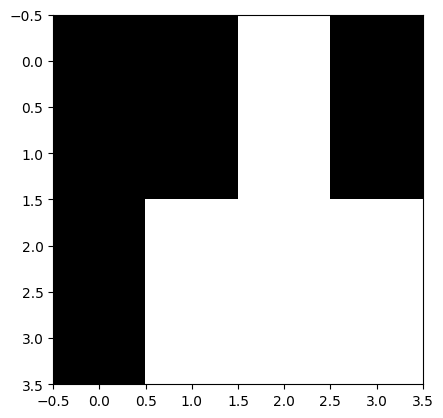

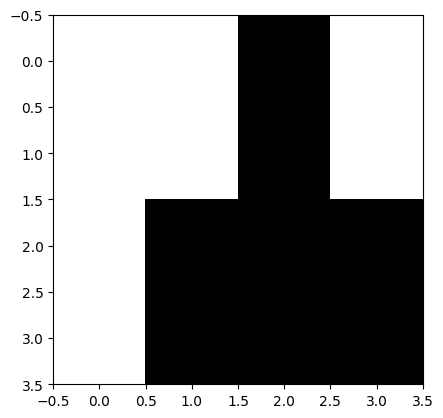

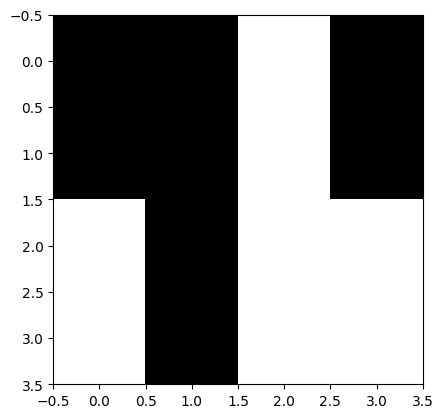

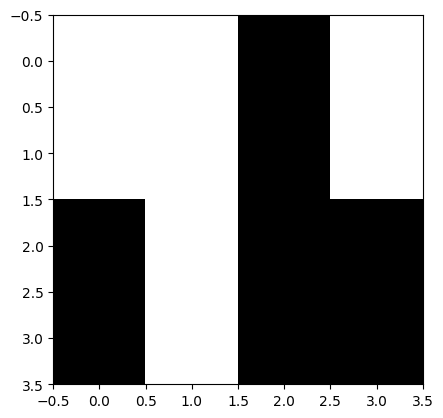

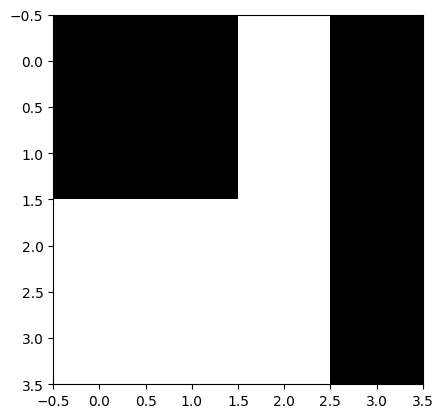

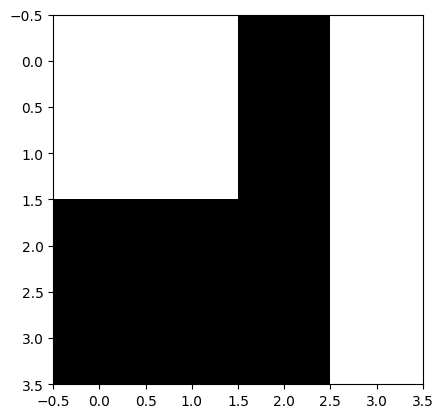

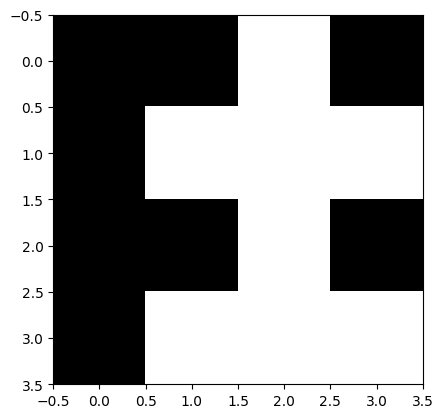

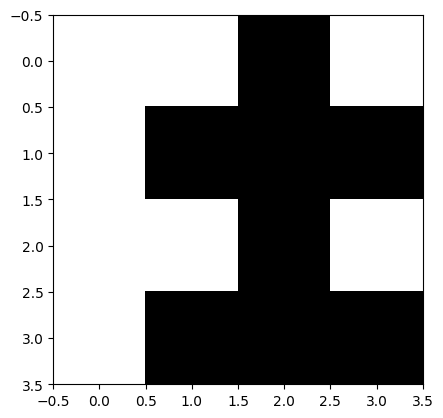

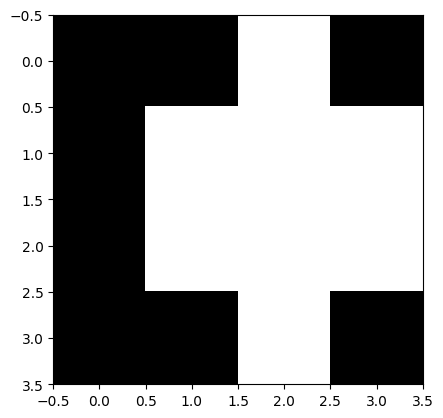

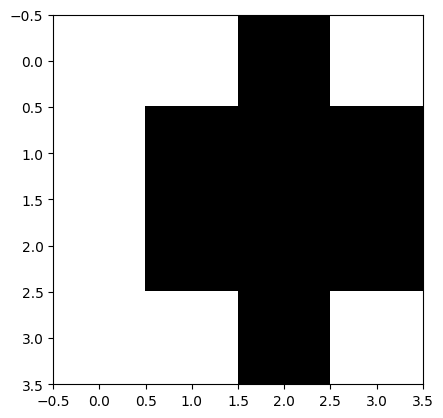

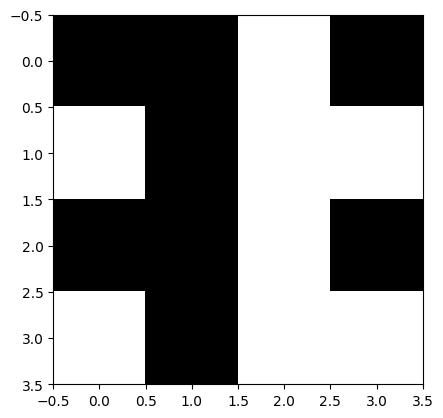

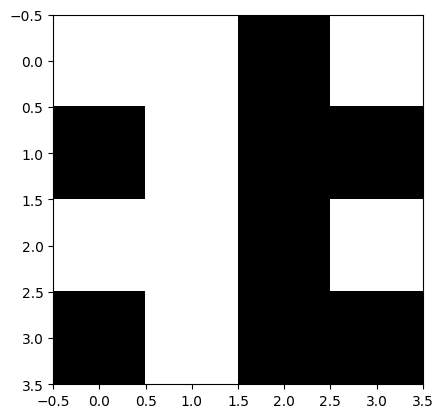

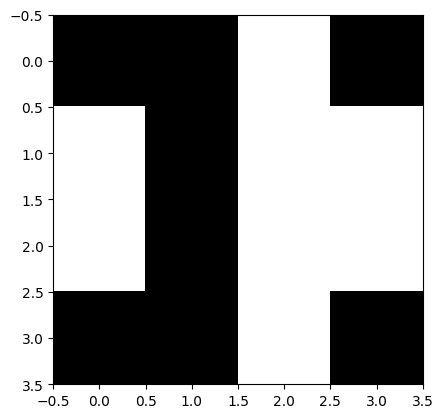

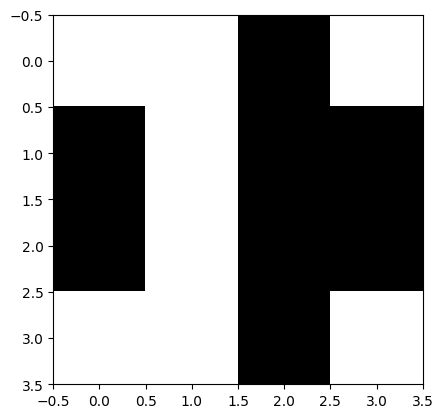

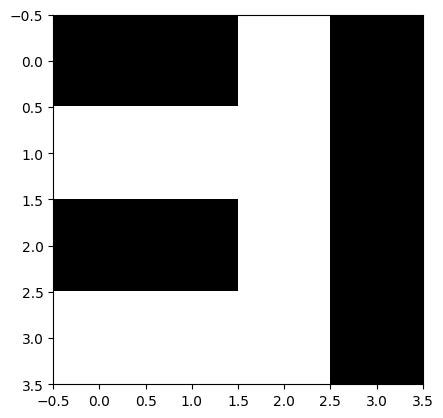

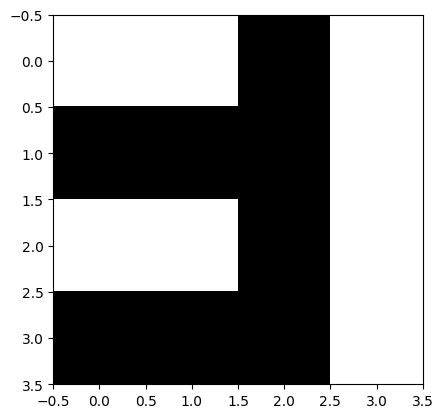

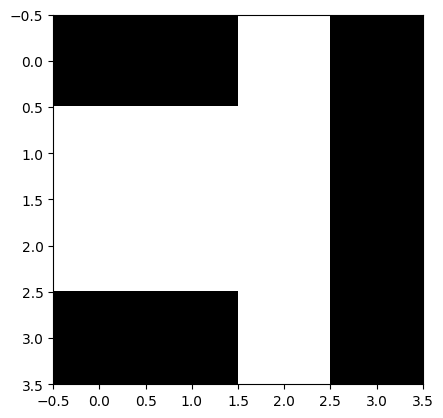

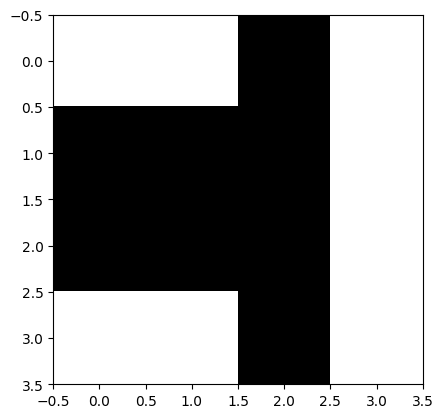

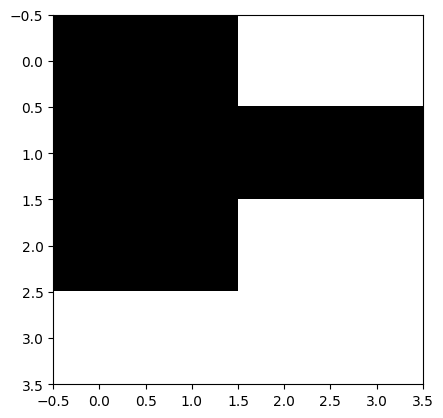

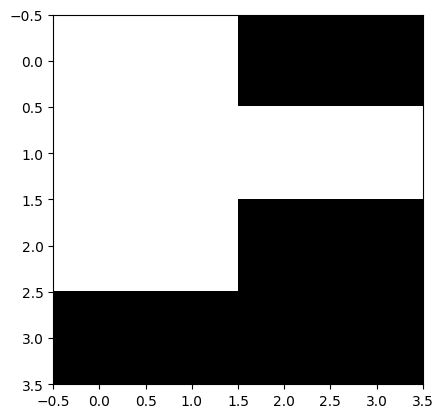

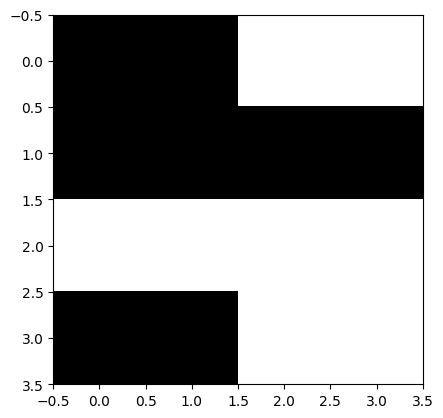

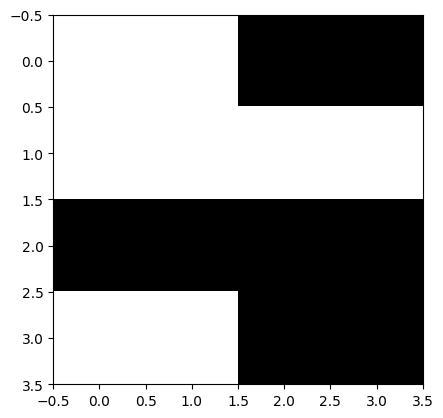

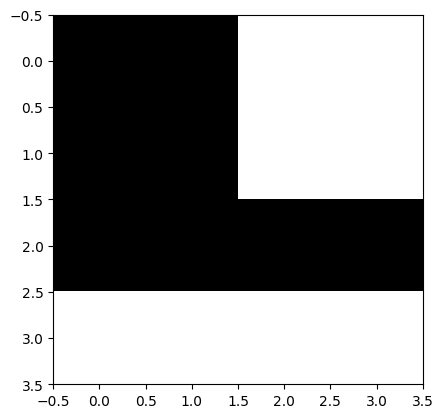

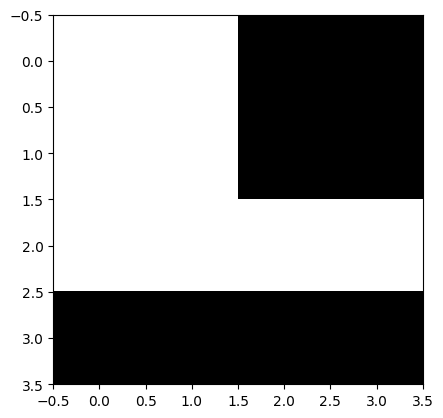

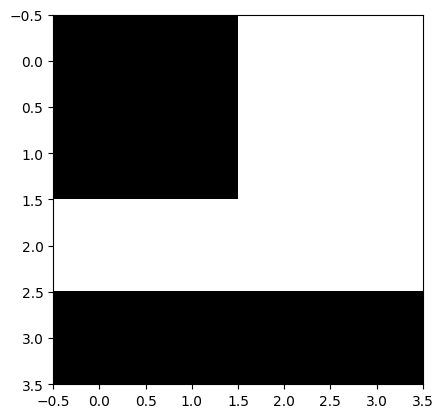

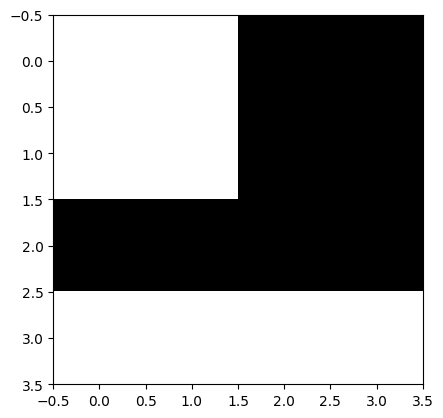

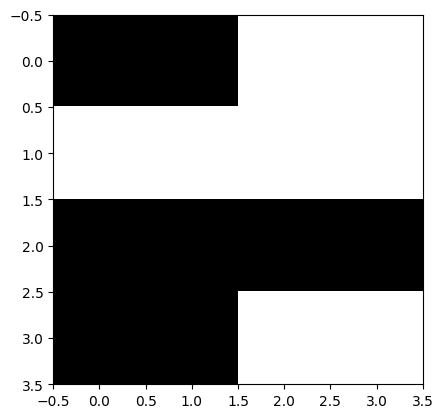

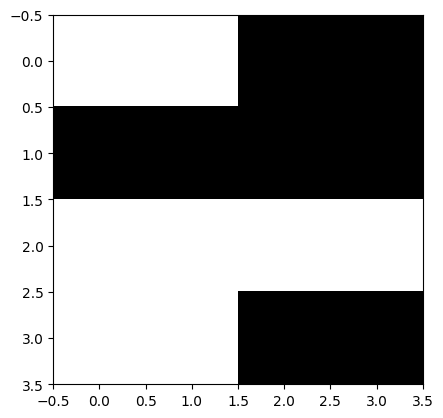

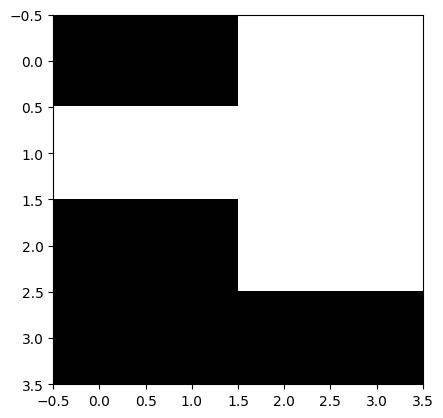

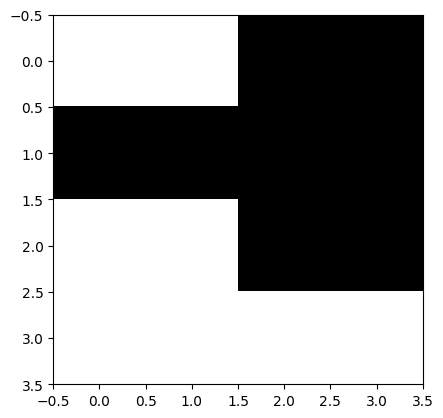

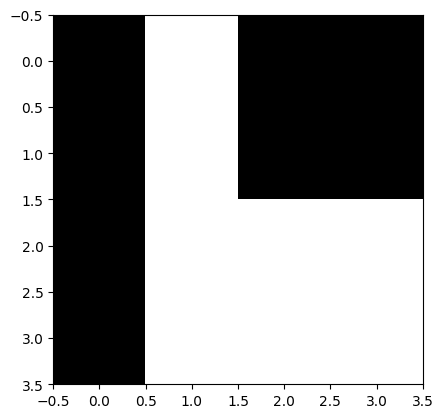

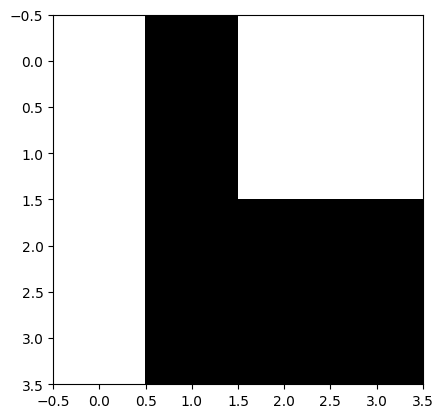

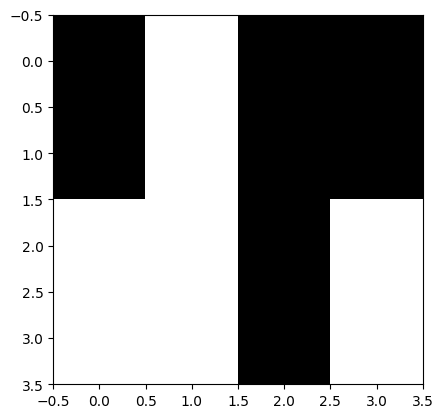

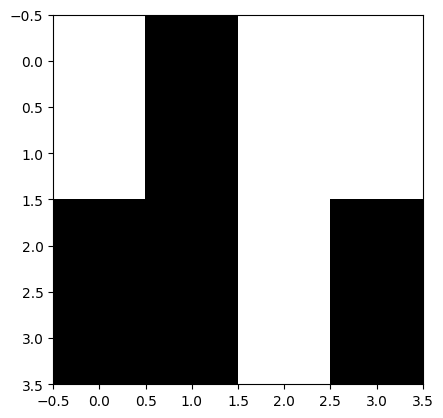

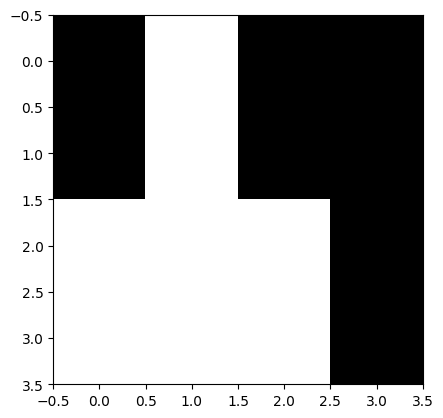

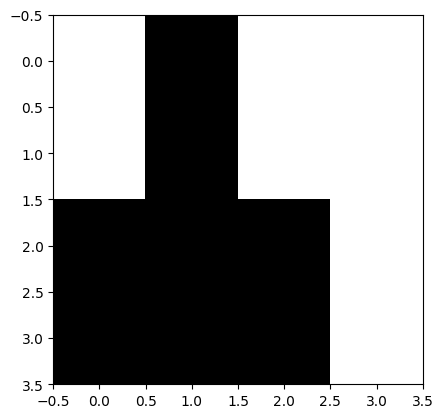

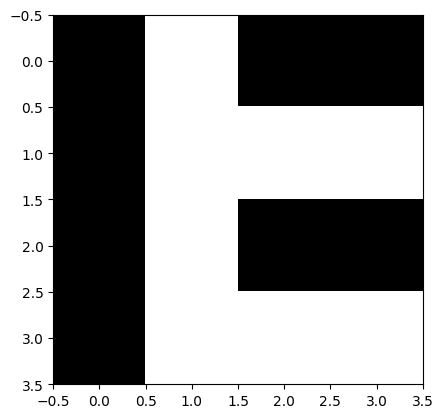

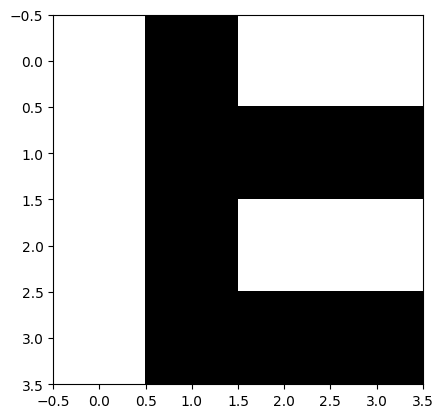

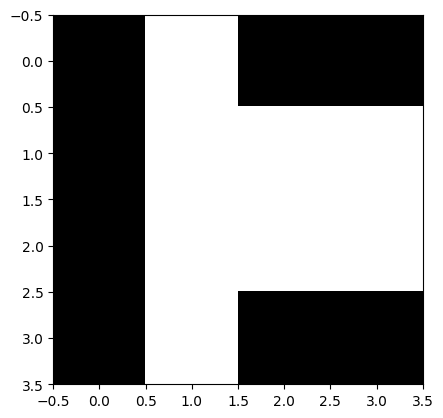

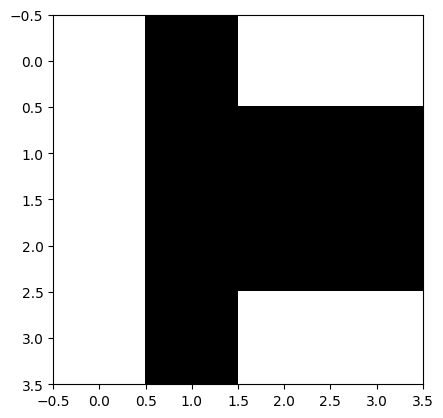

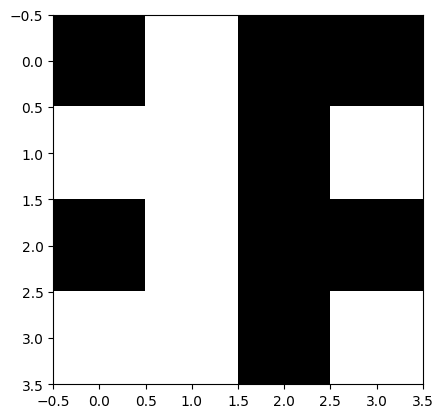

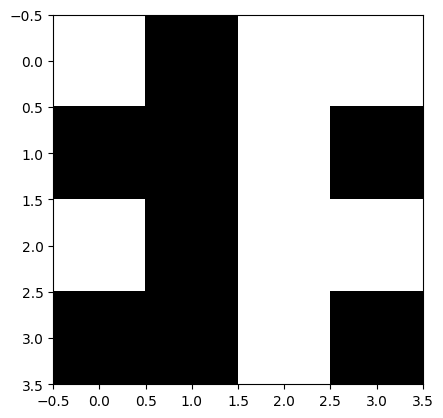

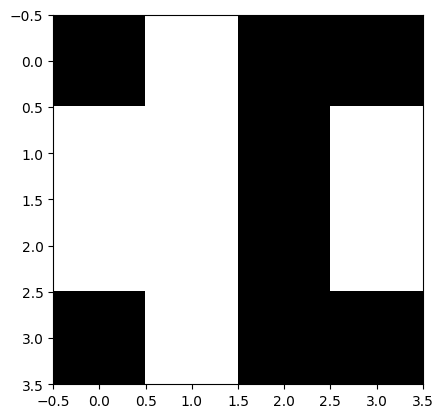

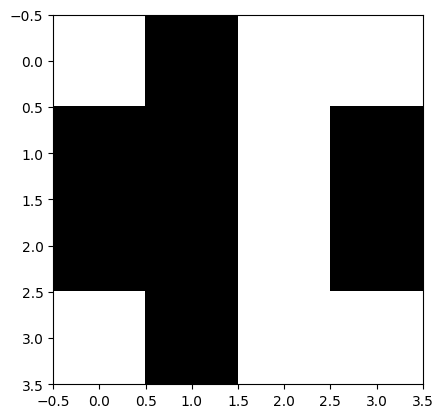

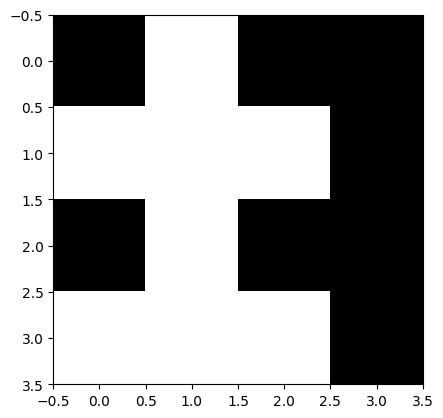

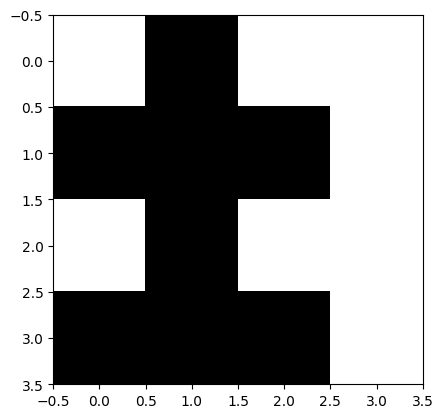

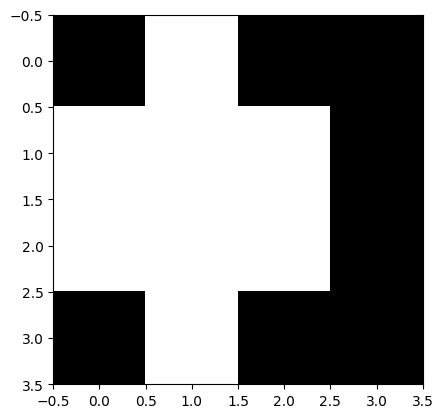

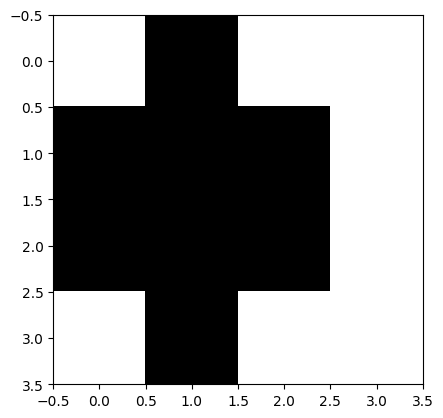

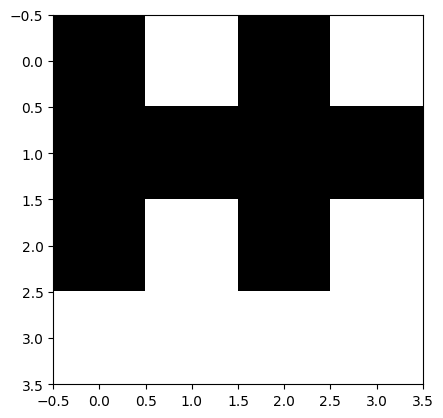

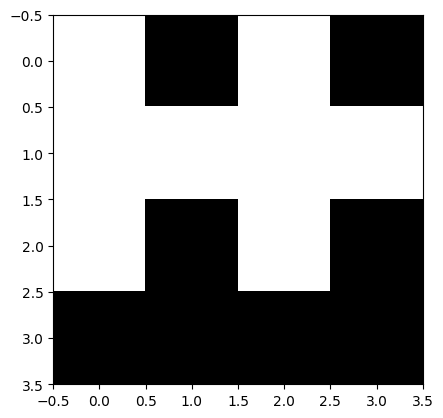

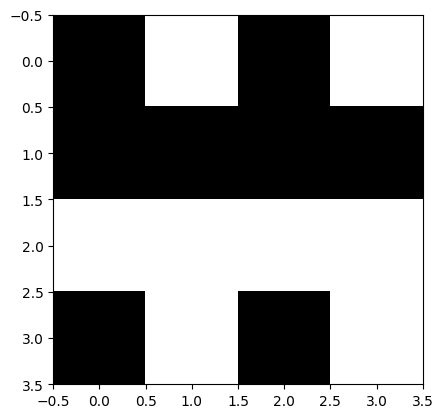

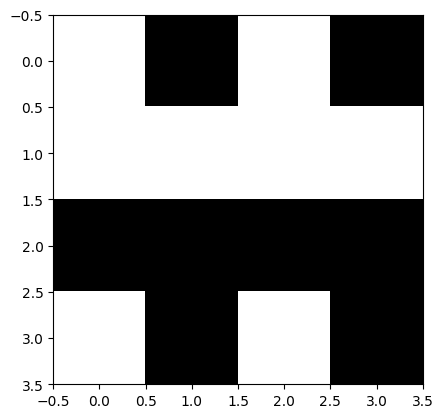

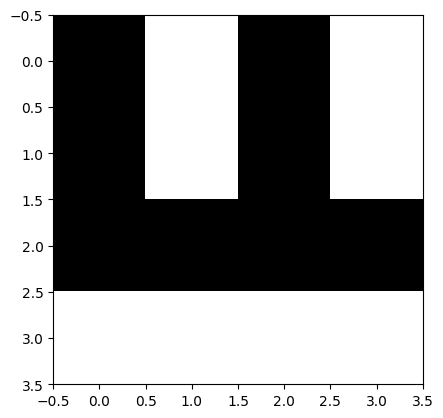

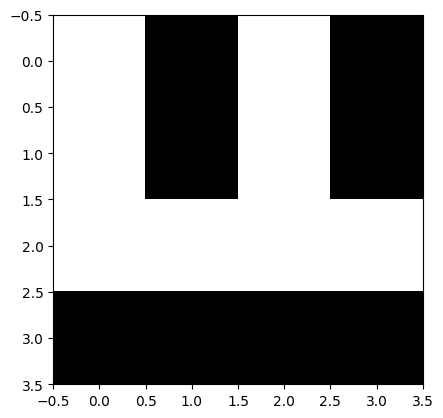

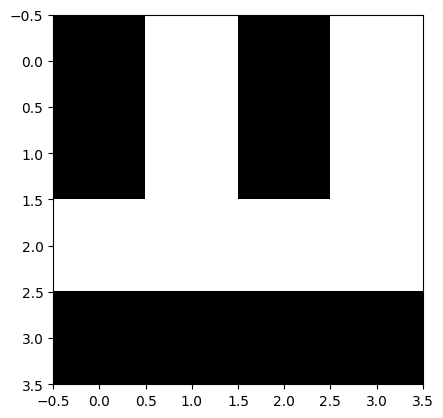

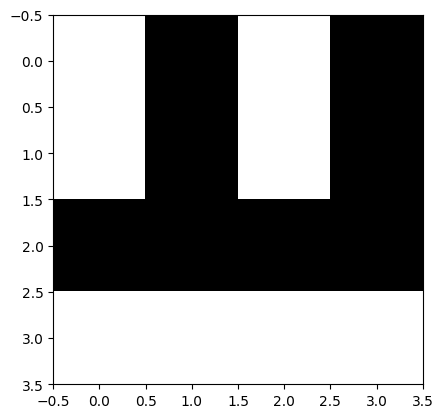

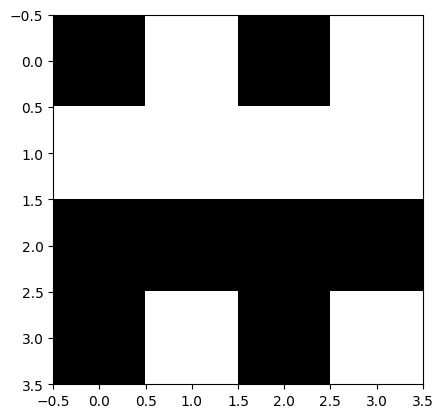

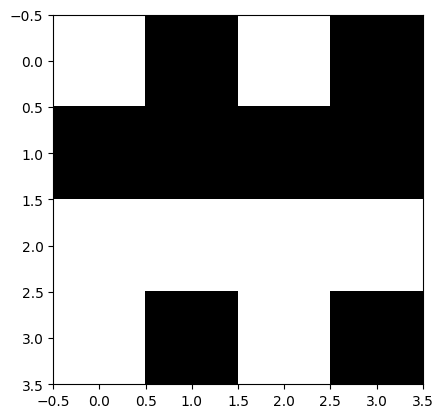

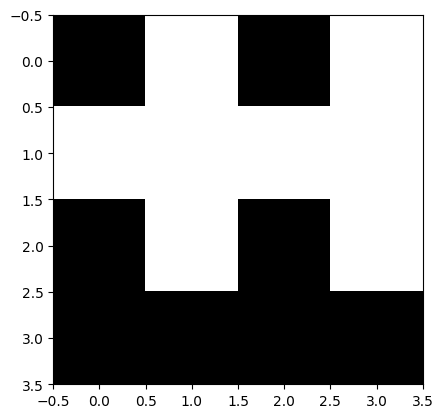

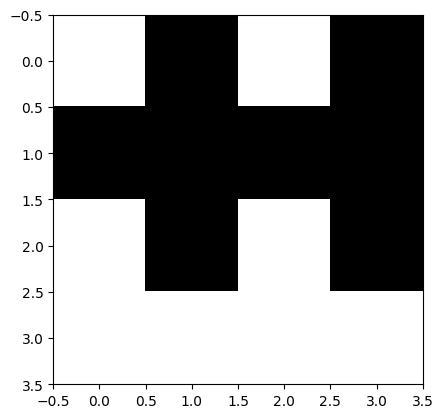

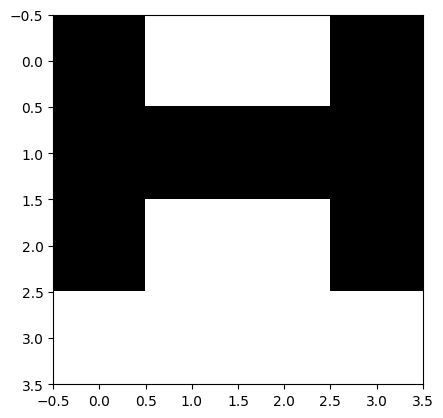

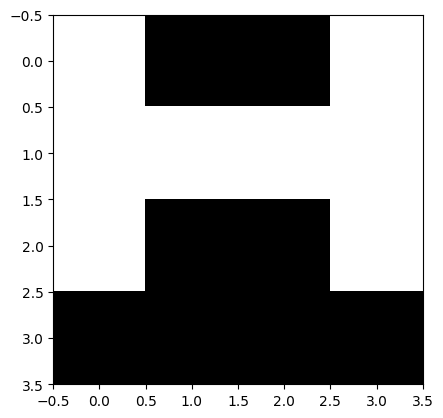

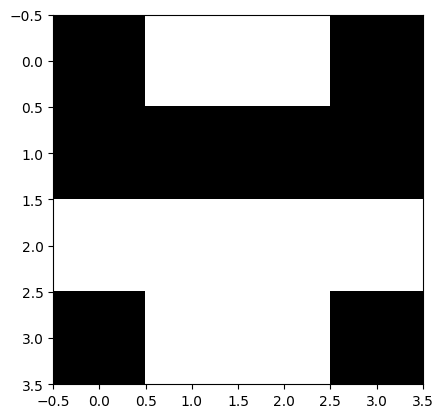

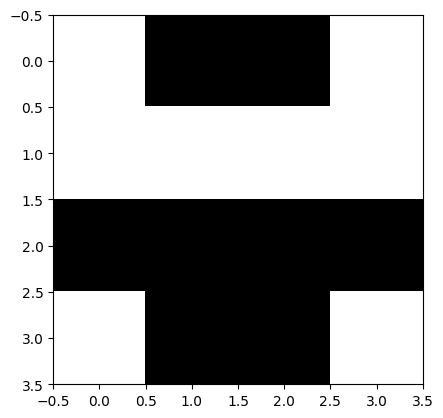

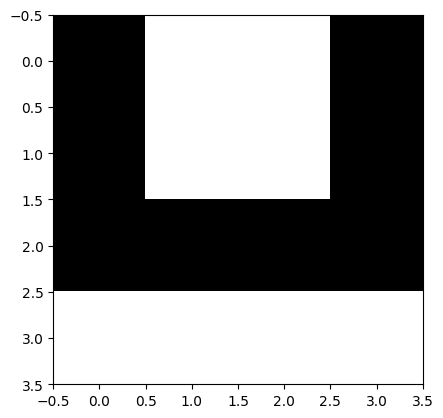

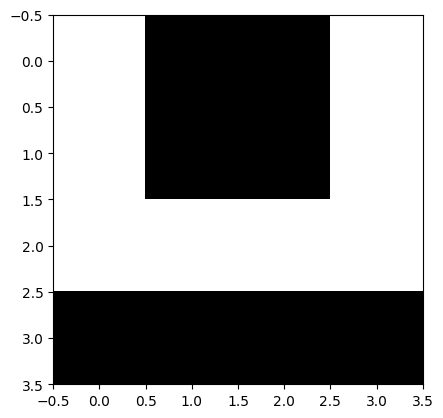

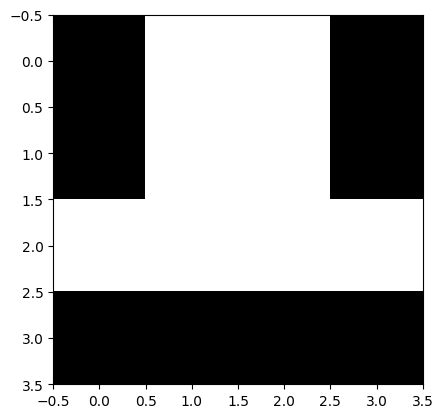

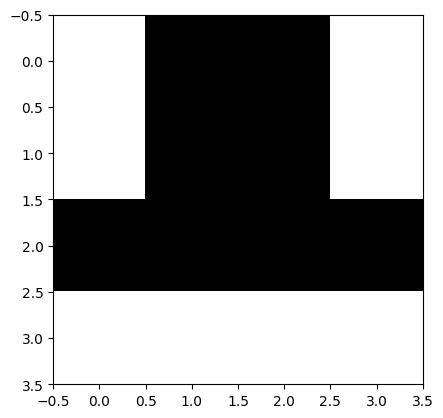

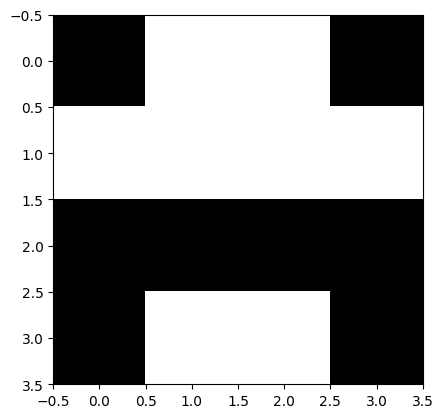

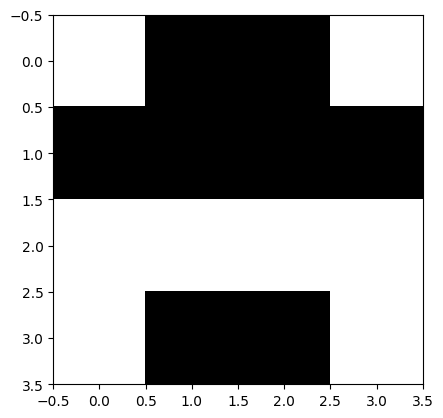

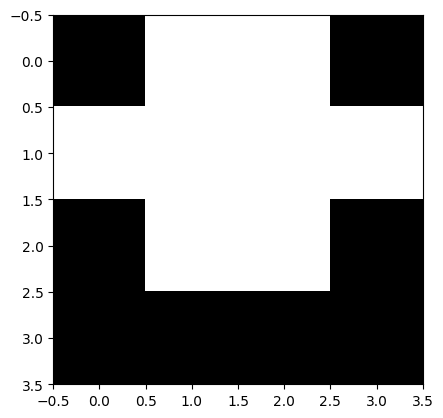

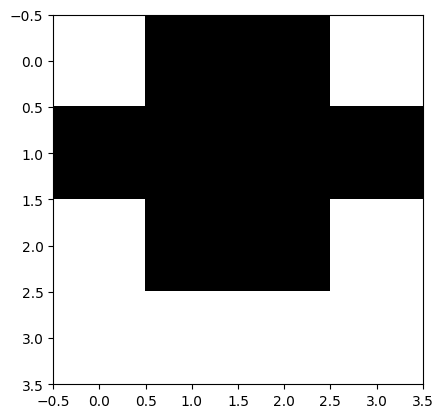

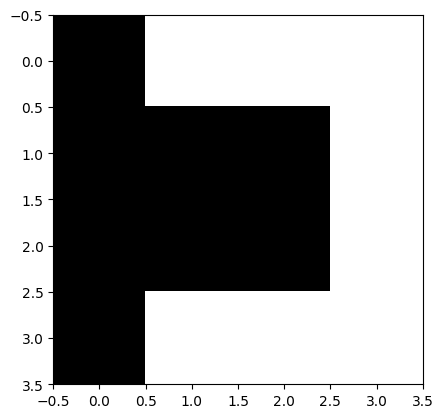

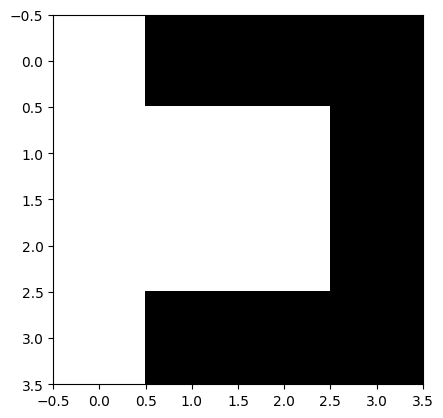

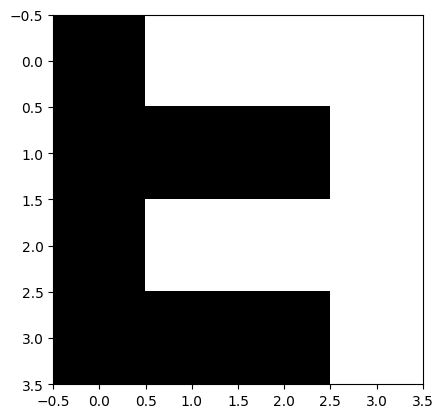

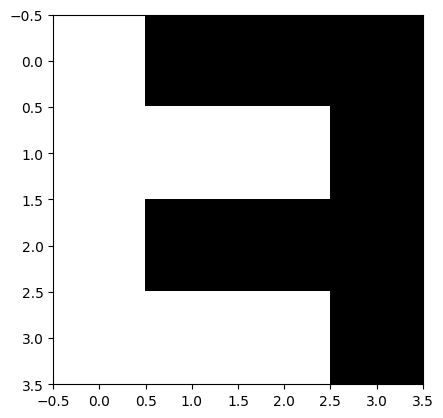

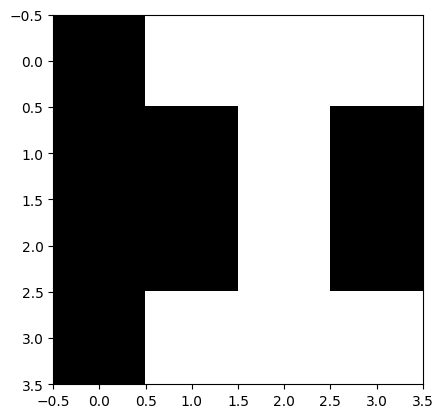

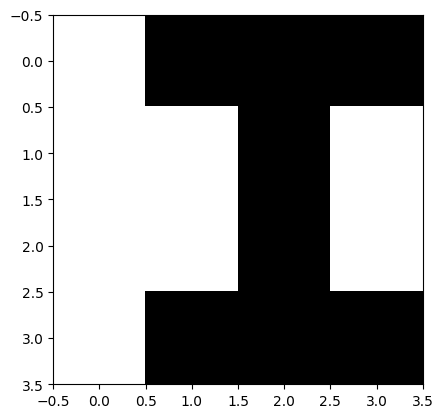

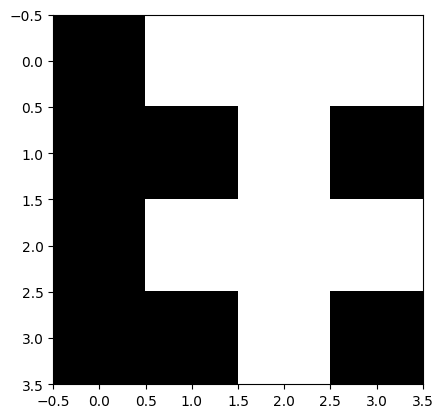

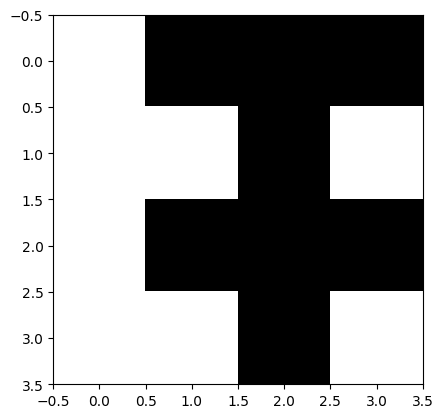

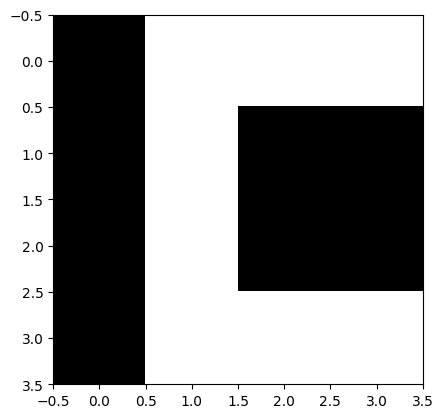

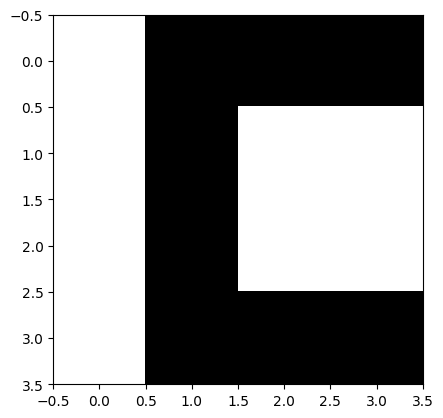

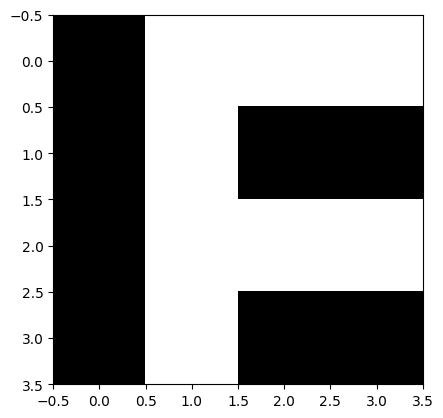

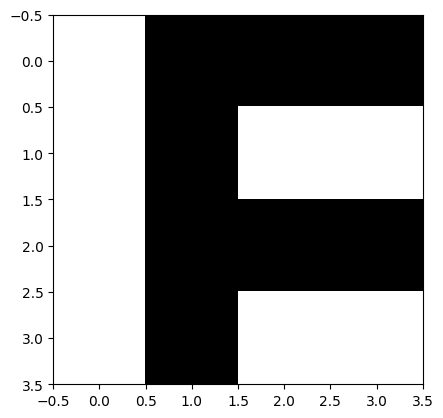

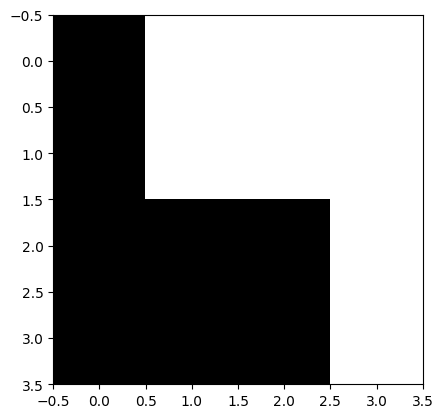

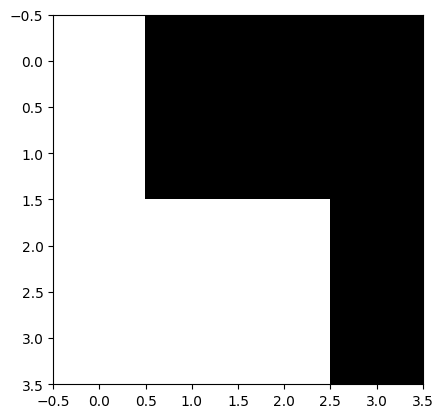

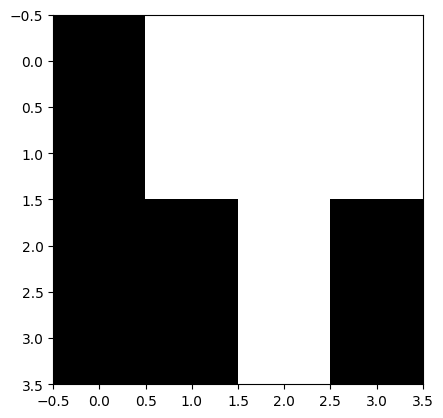

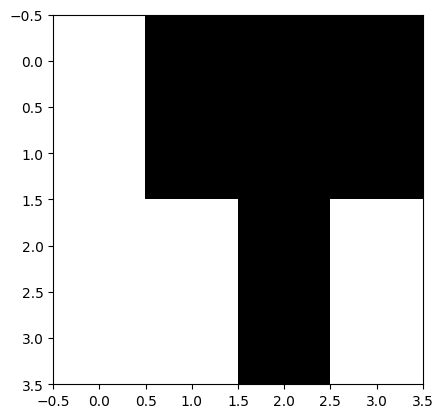

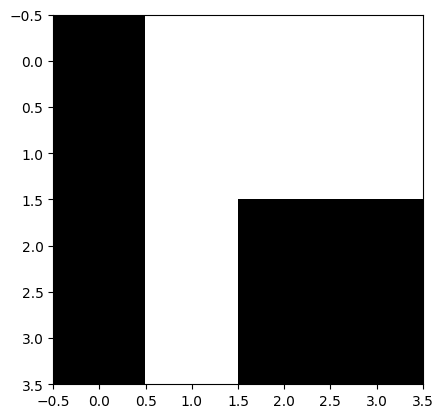

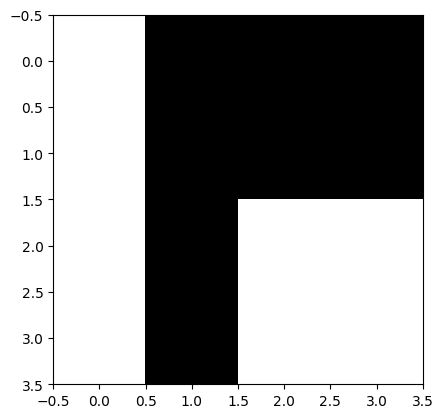

In [10]:
for protocol in povm_tetra.lowest_measures:
    plot_protocol(protocol.protocol)
    
    plt.show()

Nothing new here again. One observation to make is that in every protocol it looks like there is always one complete row or column, no more and no less. One possible way of constructing these groups could be to choose a column then find all ways of picking the 4 remaining outcomes without completing another row or column. I will look into that later, for now I will move onto using the new measure of goodness to see if that makes a difference. In future I will also want to refactor all the code so all calculations are done in Mathemtica as Sympy is proving to be temperamental.

In [3]:
povm_tetra.calculate_measures_mathematica(eigen_value_measure_new_mathematica)

Calculating 65536 measures...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 65536/65536 [1:57:39<00:00,  9.28it/s]


Done!


In [4]:
povm_tetra.save()

In [5]:
povm_tetra.calculate_lowest_measures()

In [7]:
len(povm_tetra.lowest_measures)

144

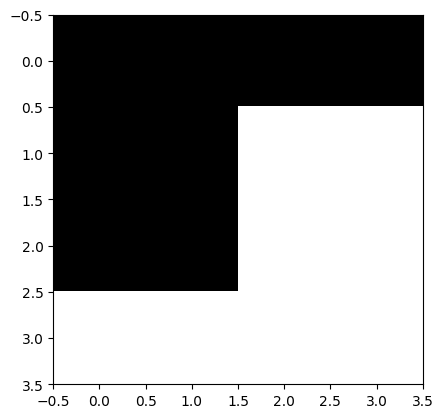

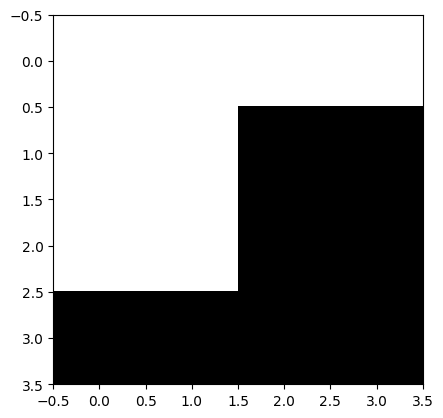

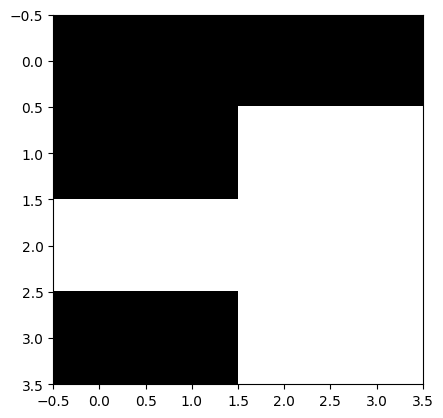

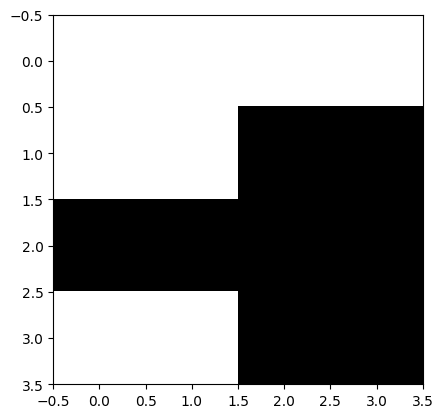

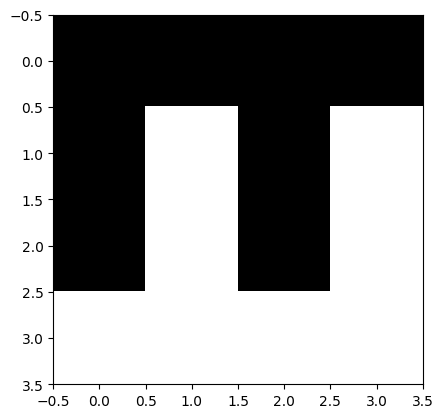

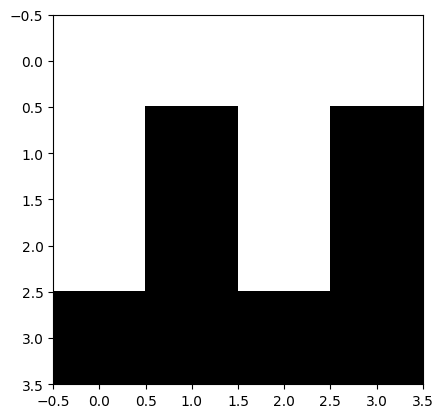

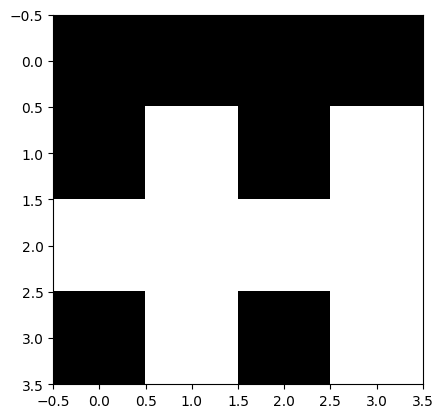

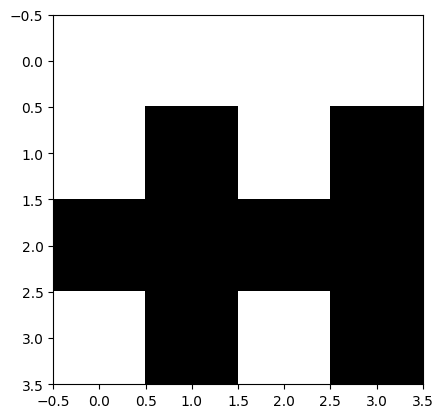

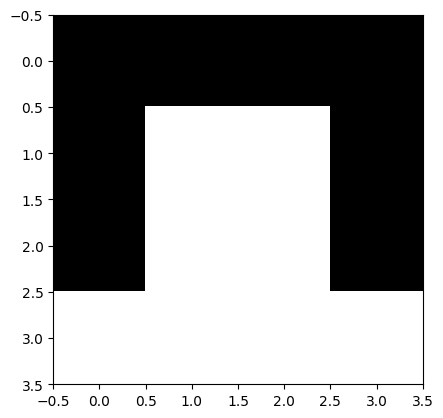

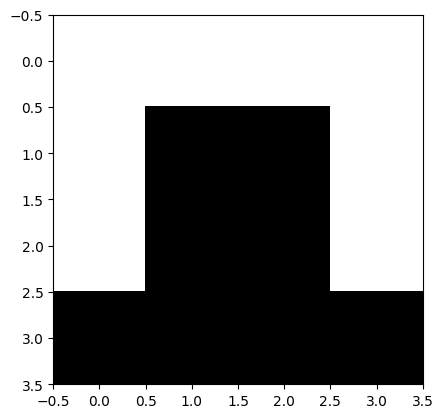

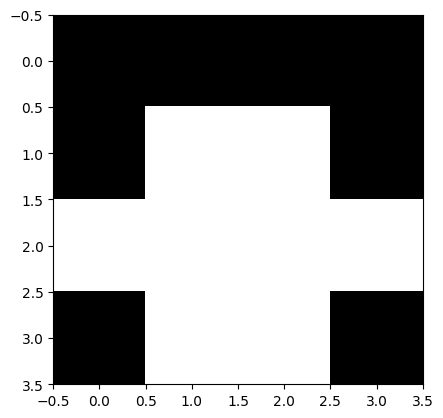

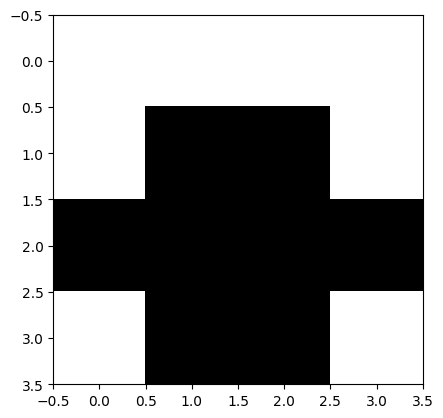

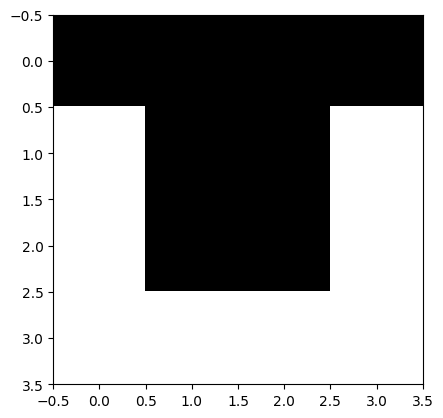

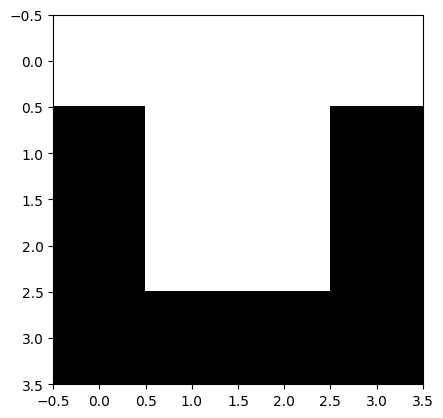

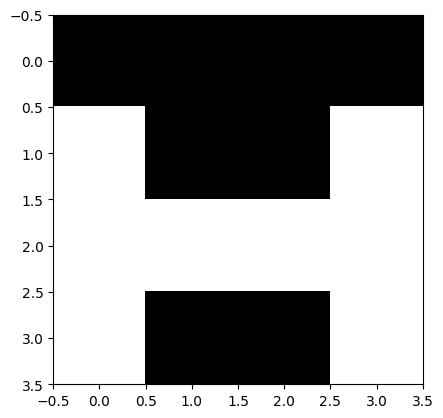

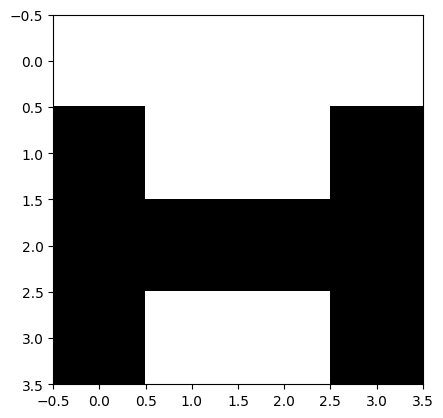

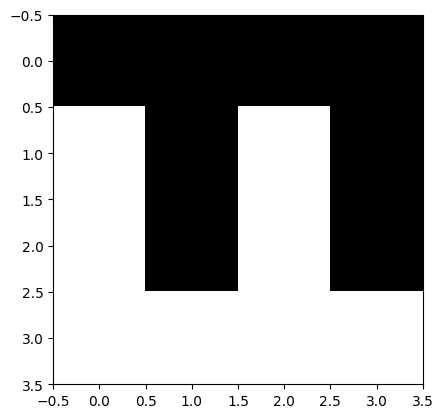

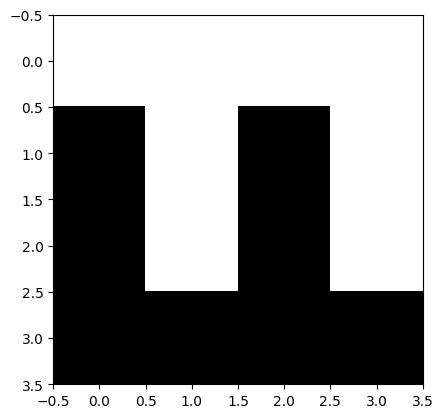

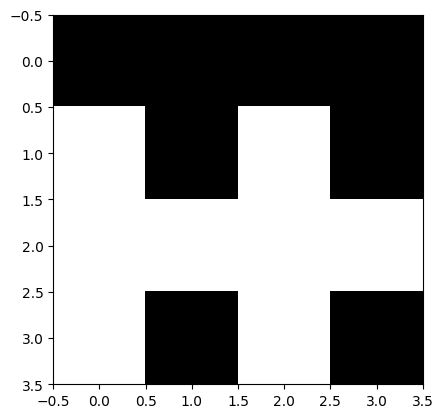

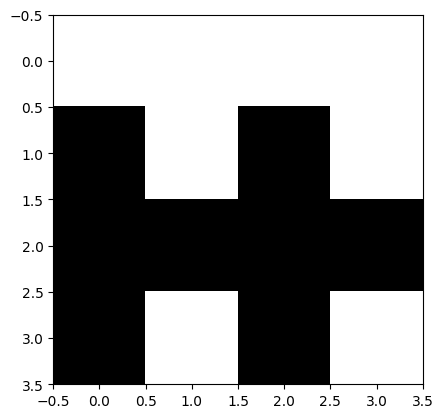

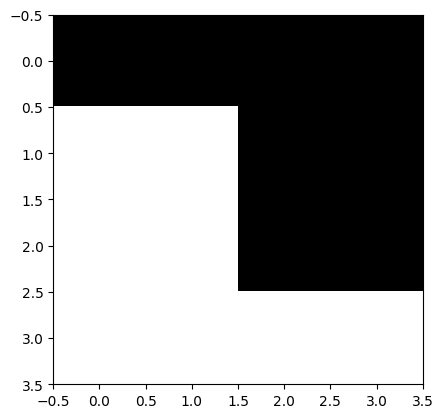

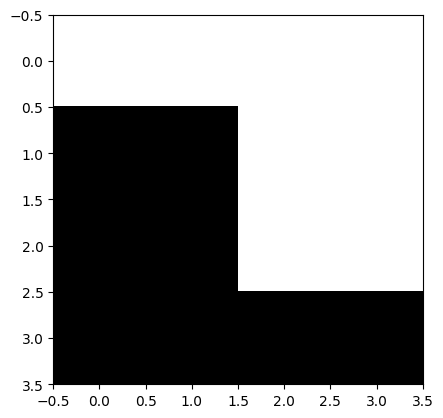

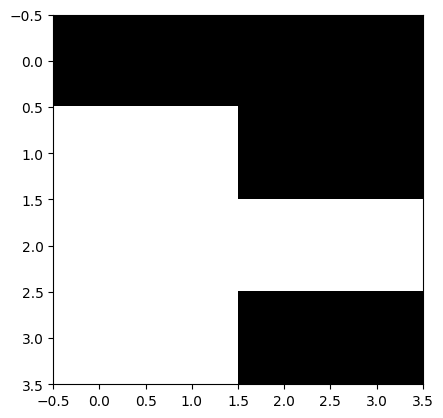

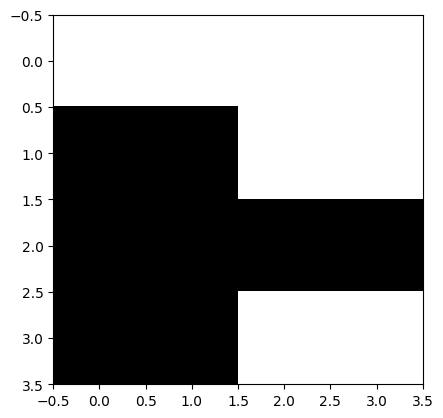

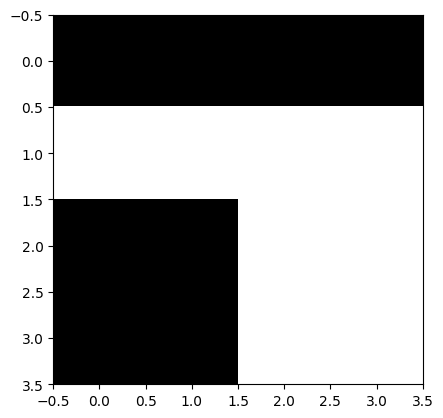

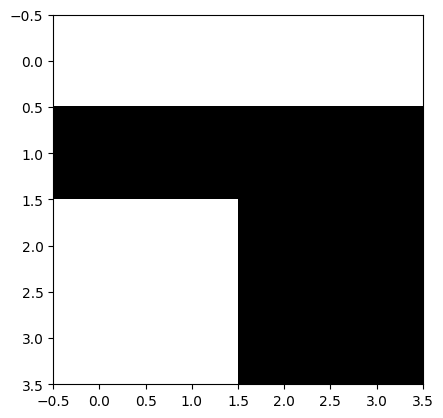

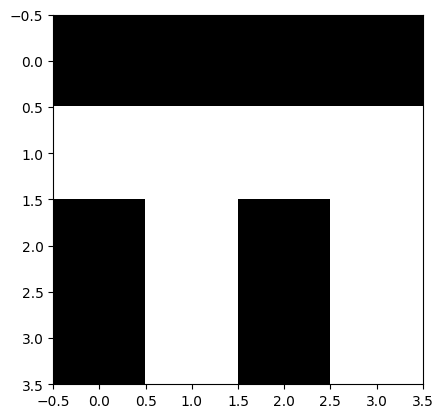

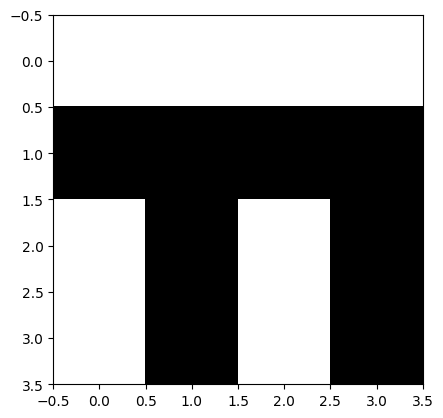

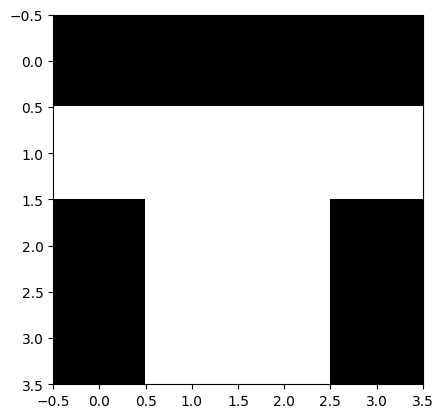

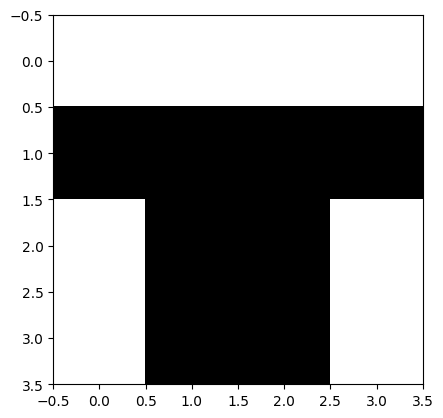

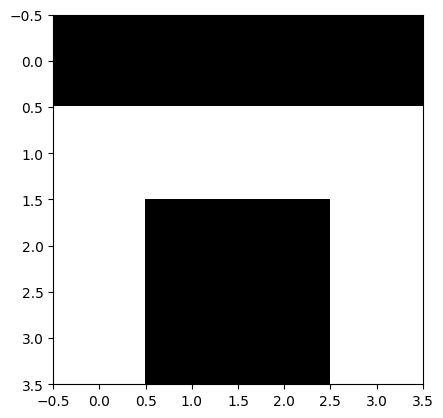

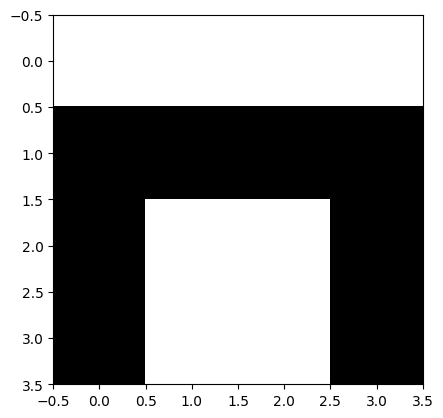

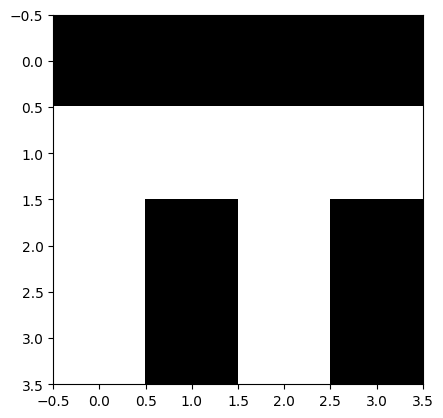

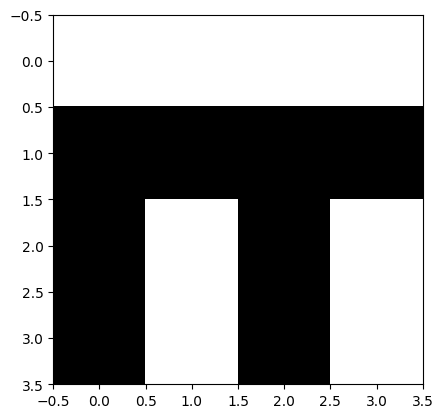

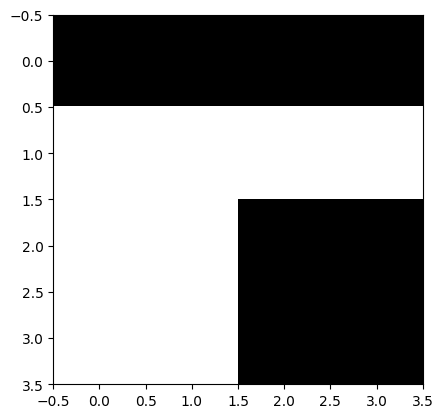

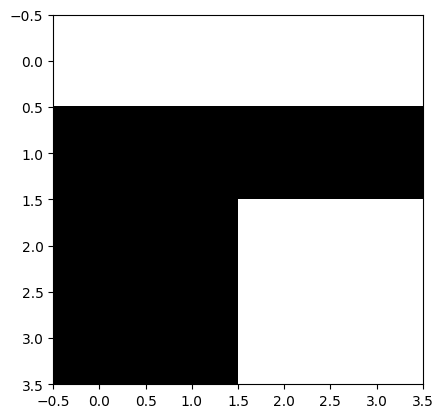

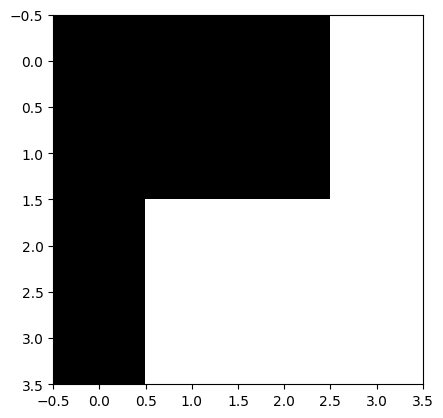

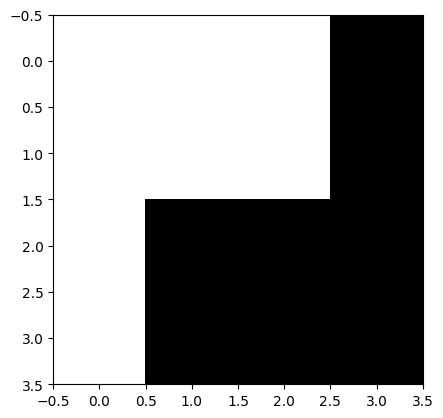

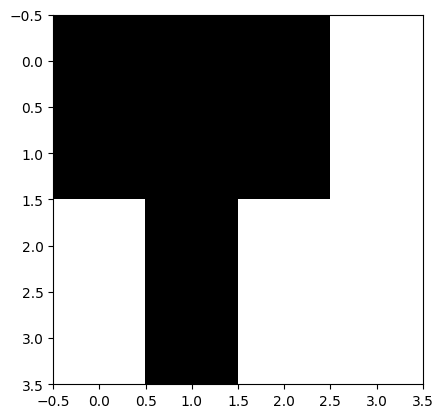

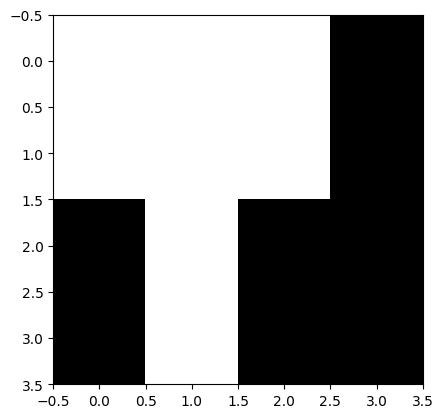

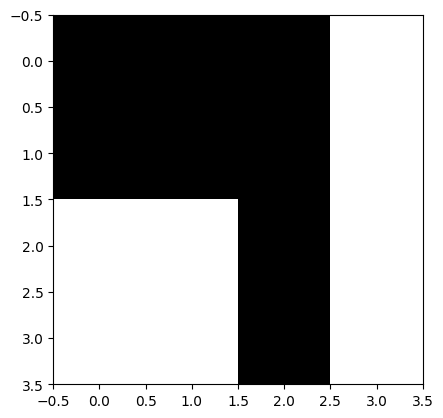

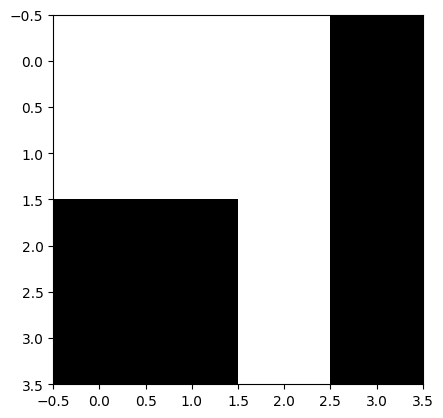

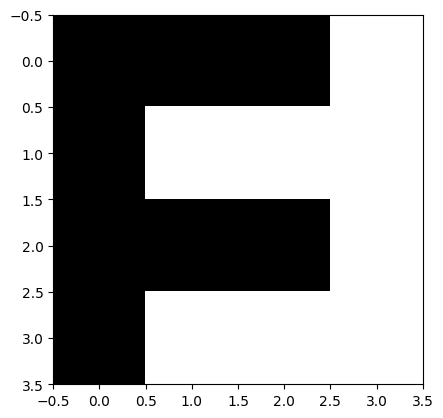

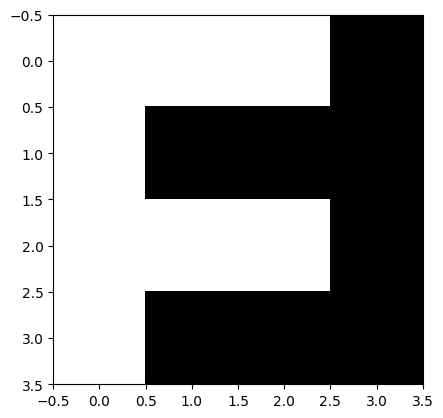

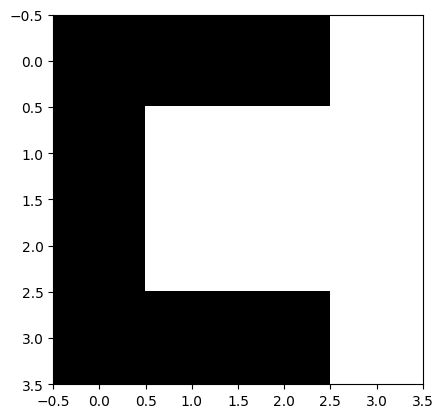

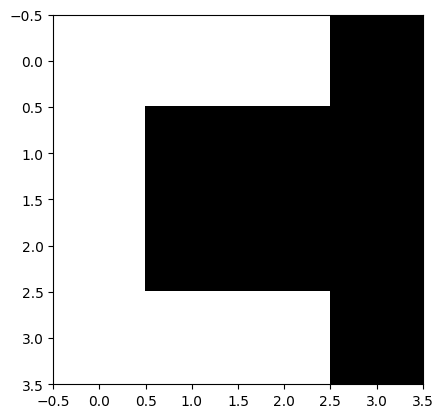

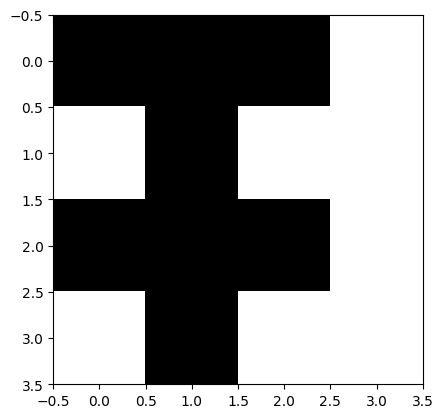

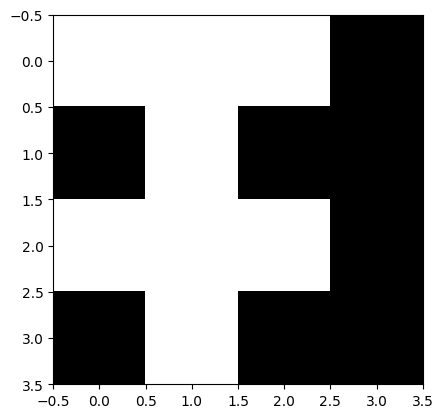

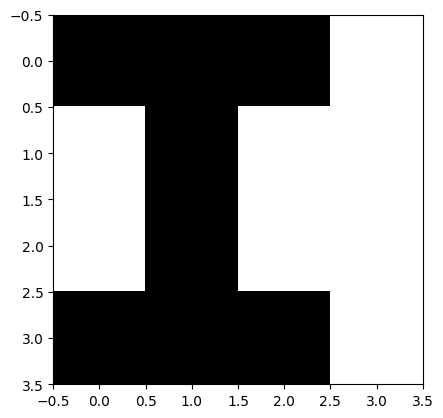

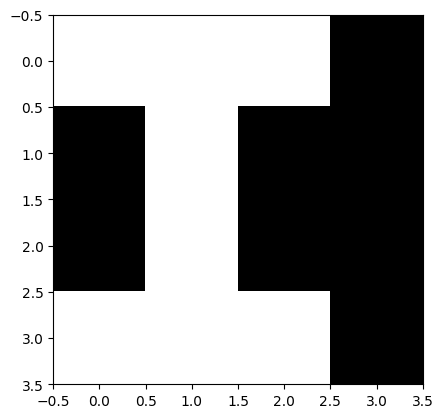

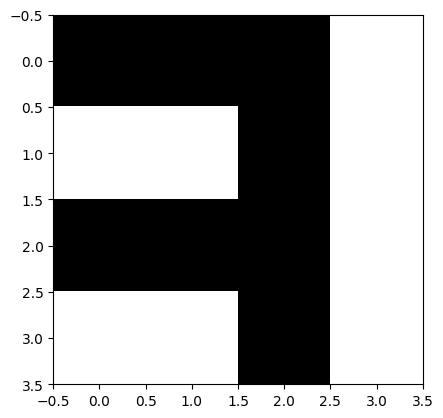

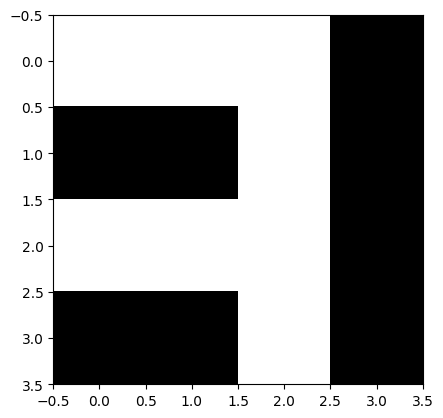

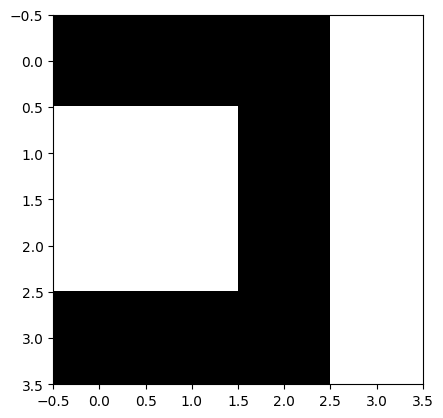

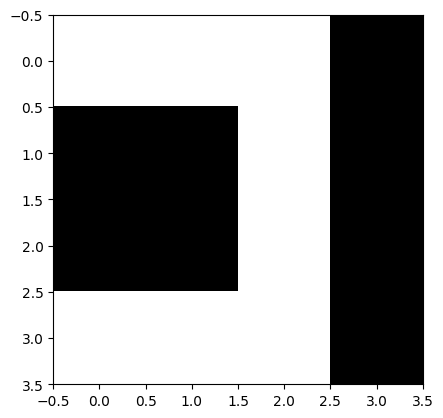

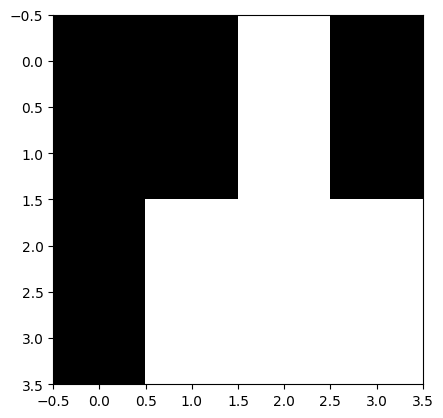

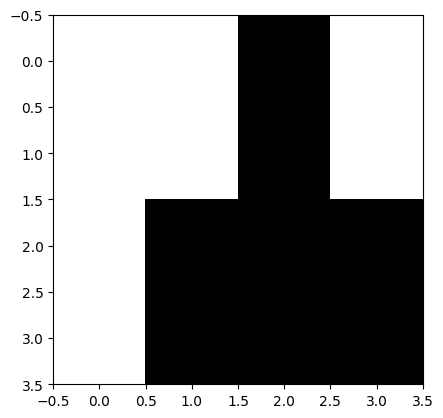

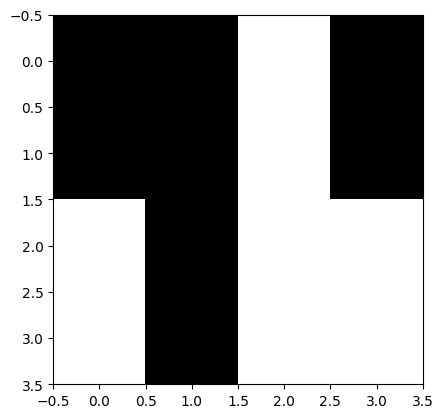

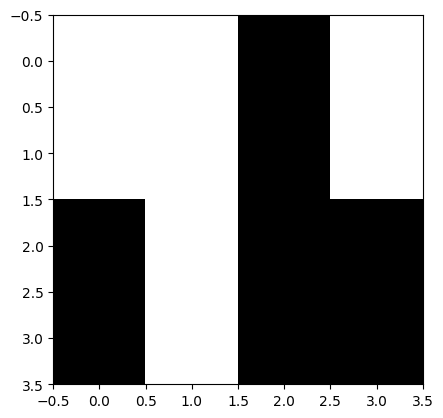

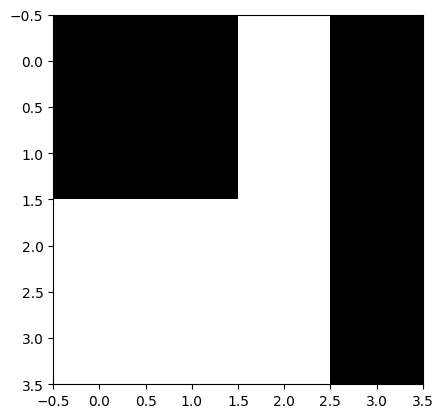

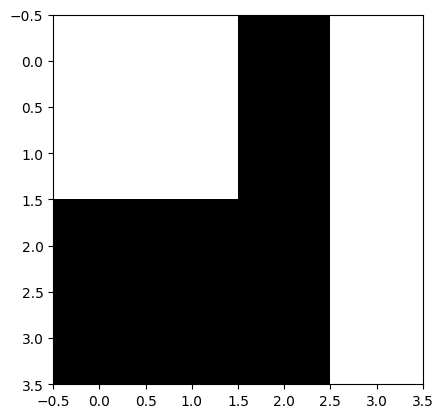

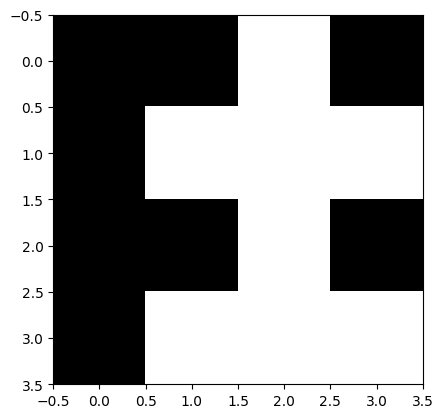

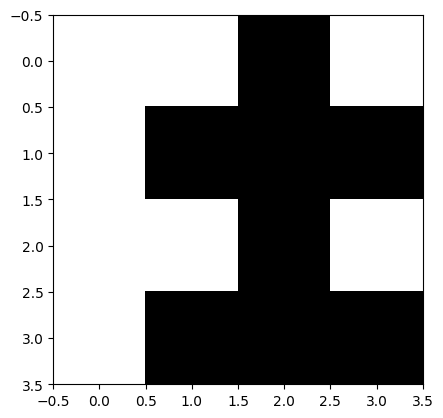

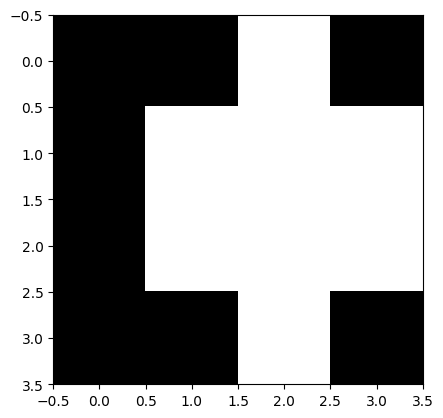

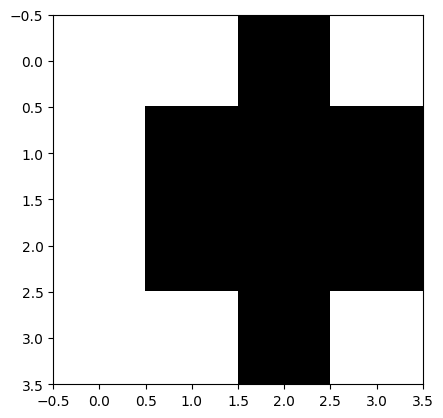

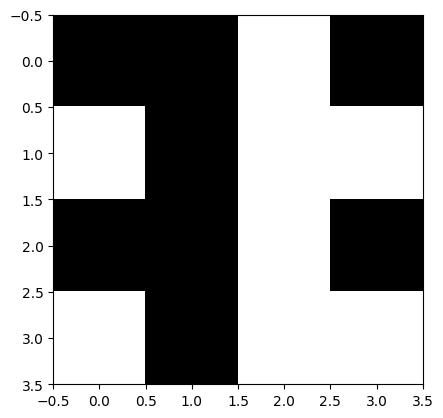

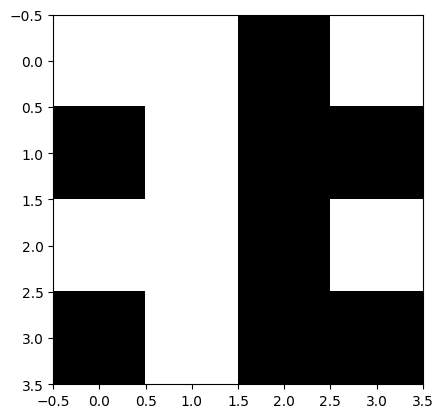

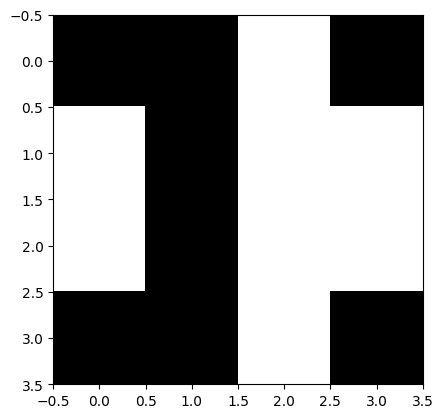

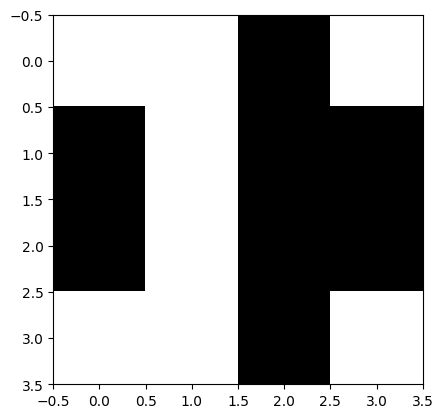

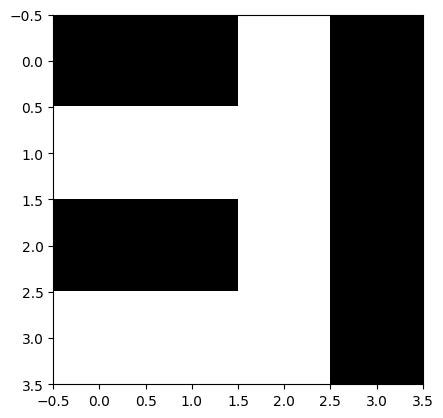

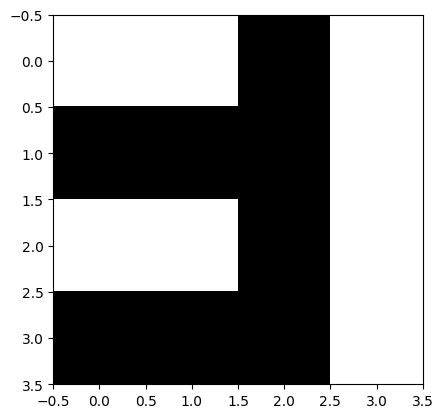

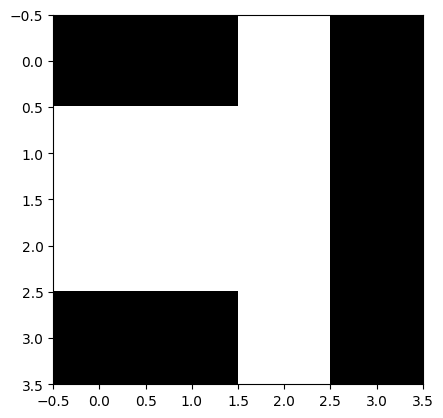

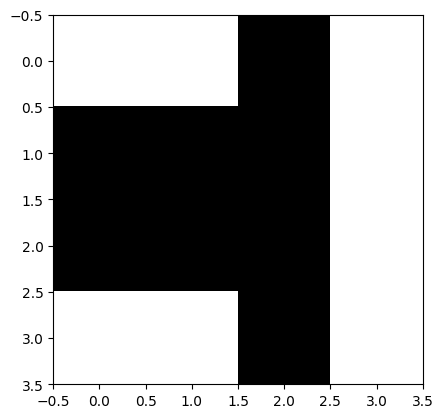

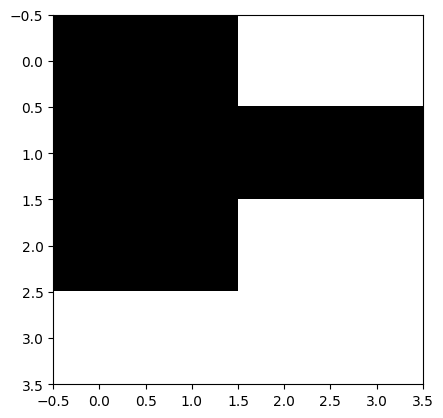

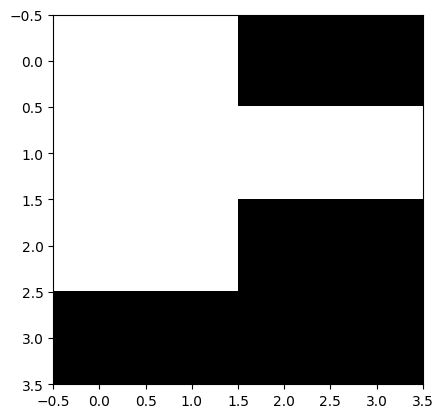

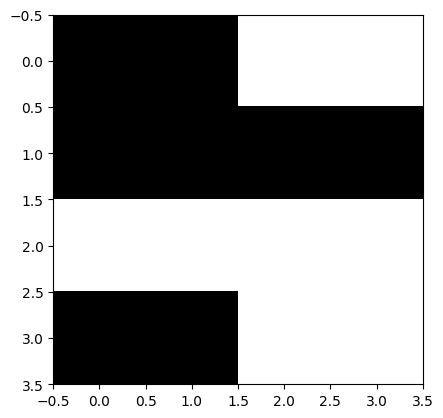

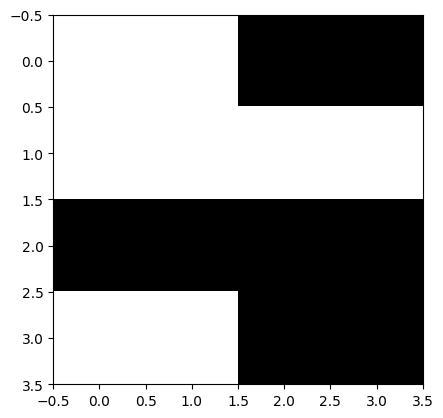

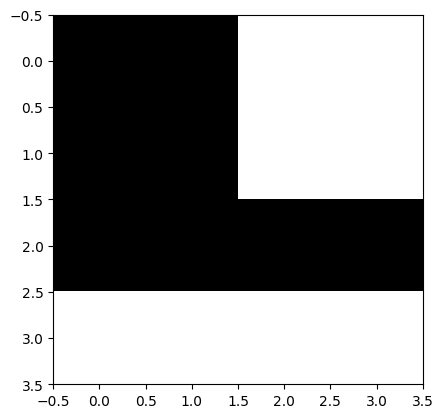

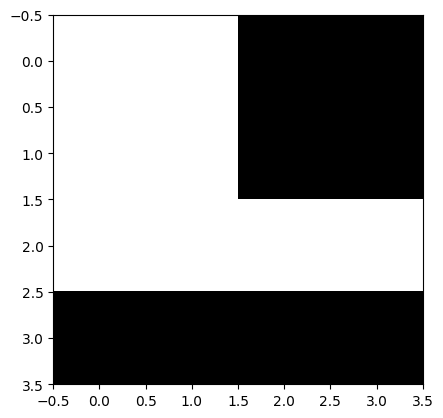

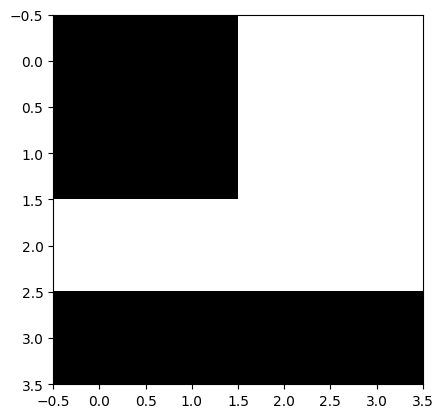

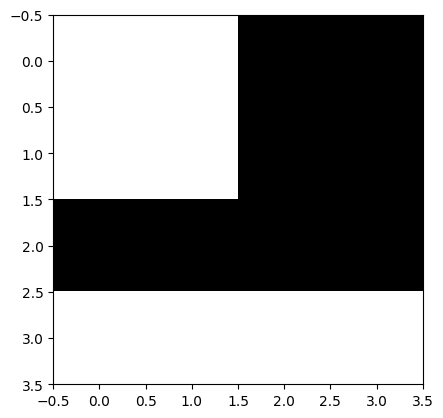

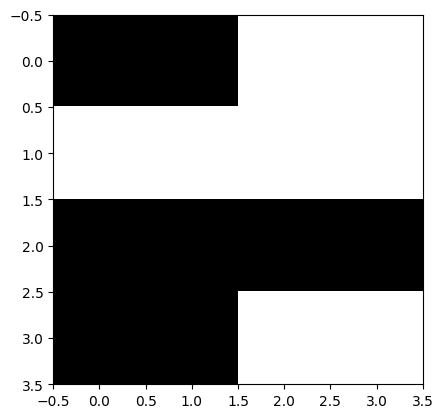

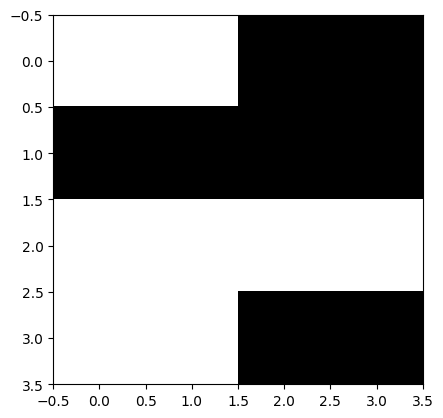

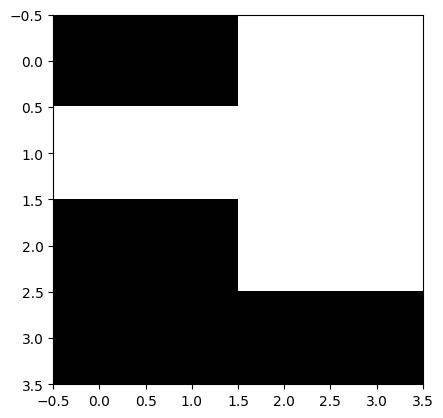

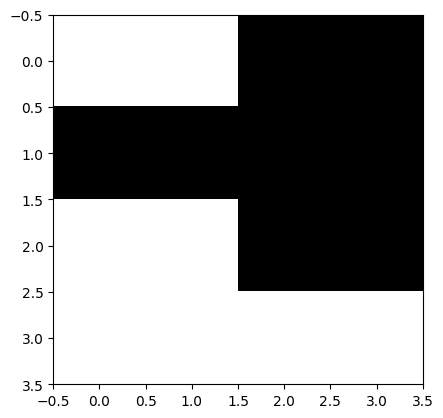

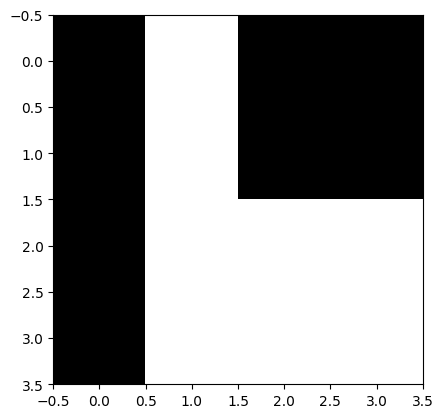

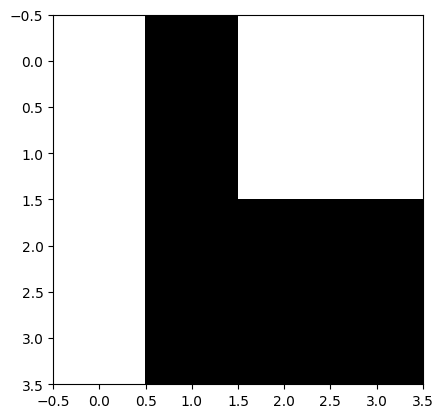

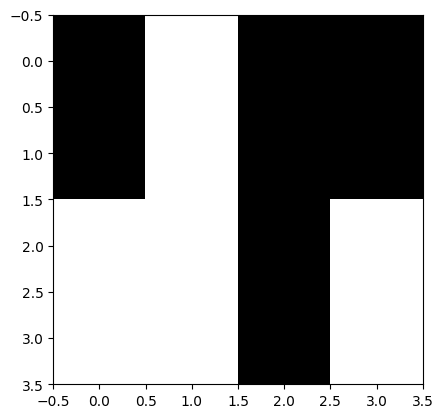

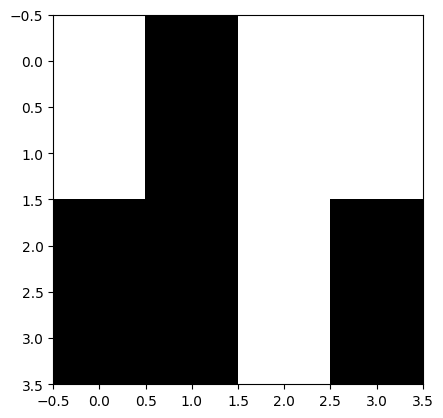

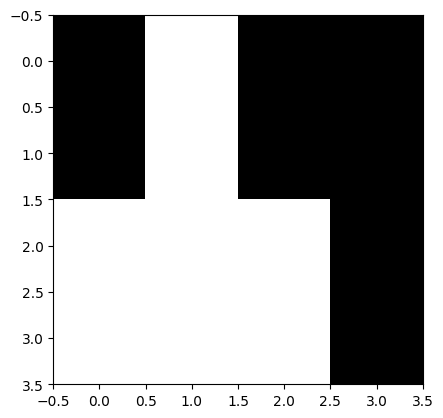

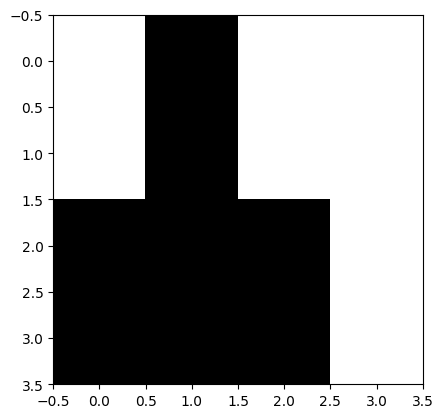

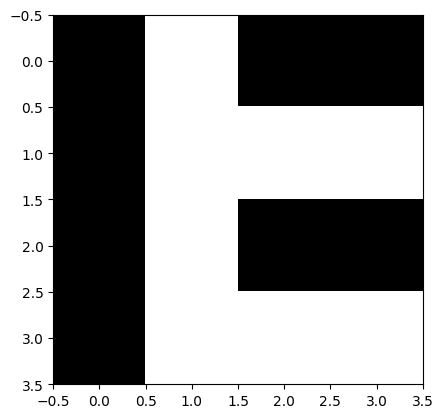

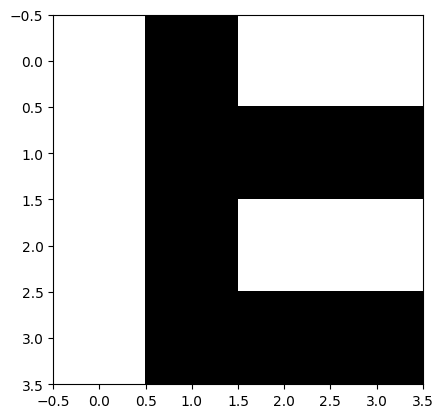

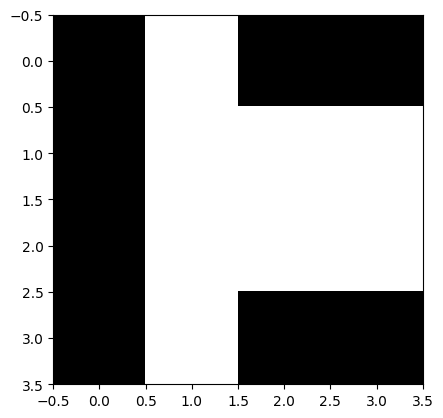

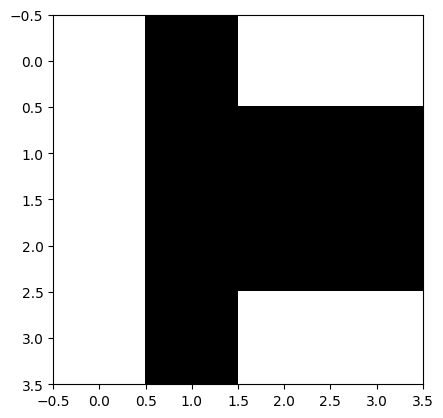

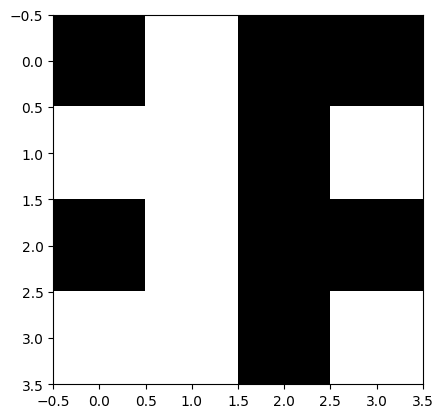

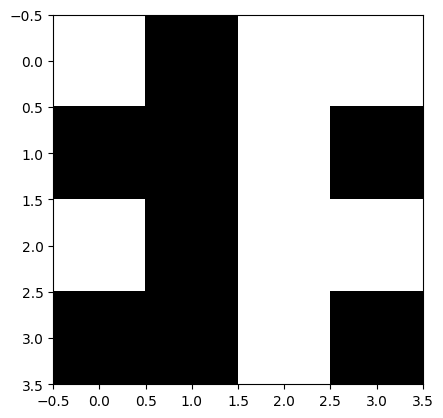

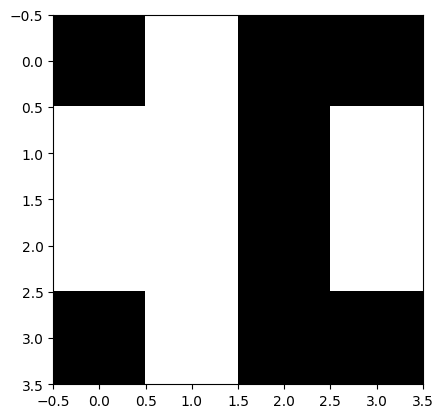

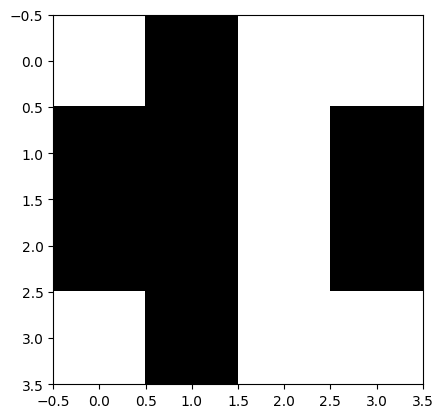

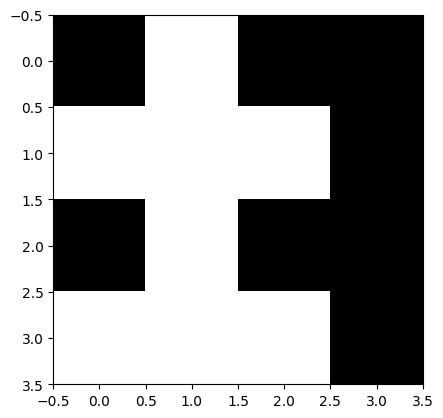

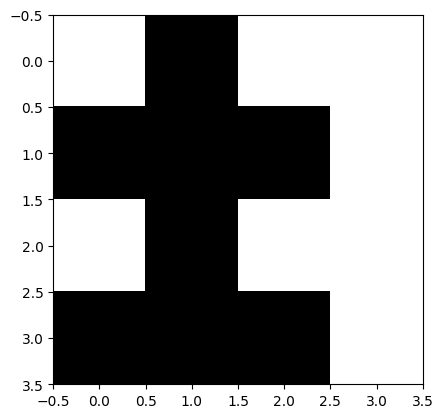

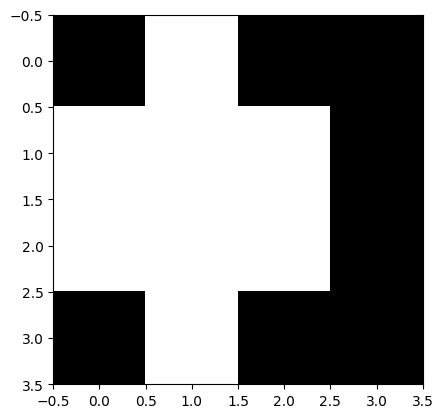

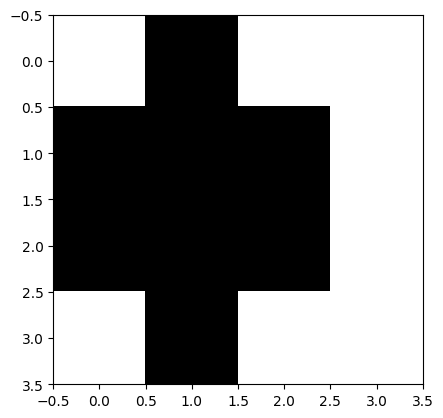

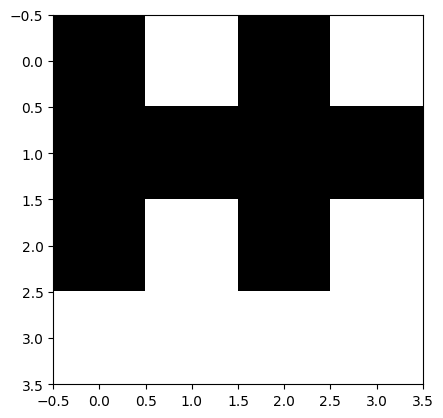

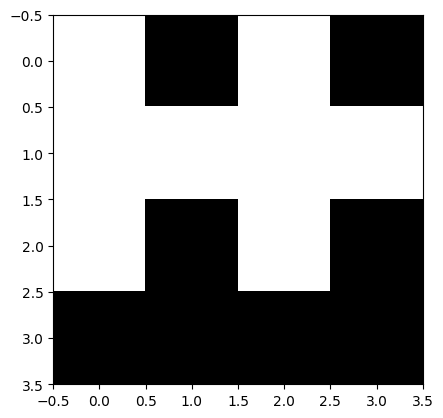

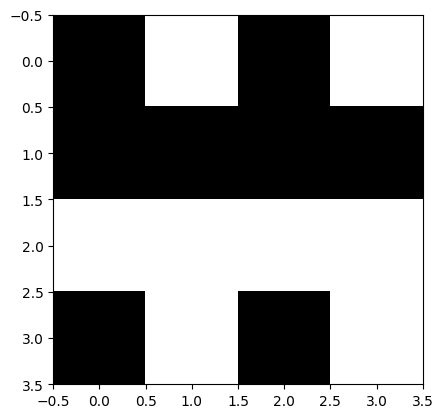

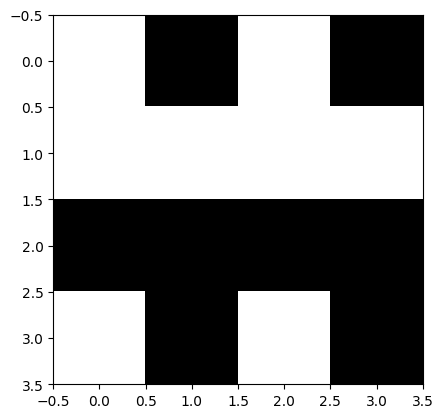

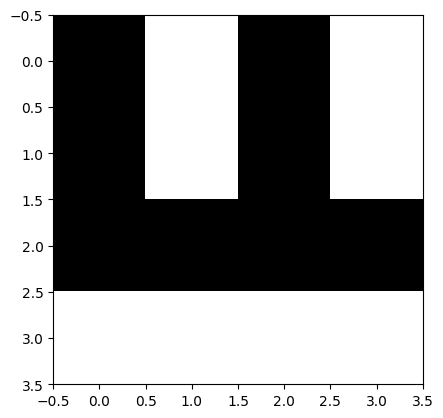

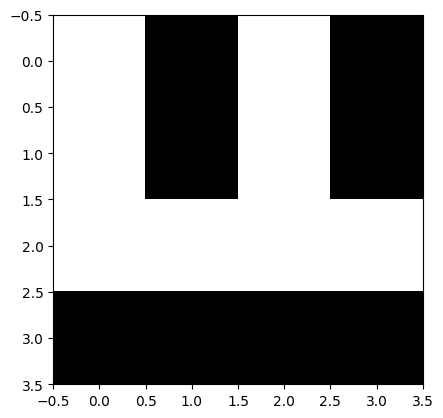

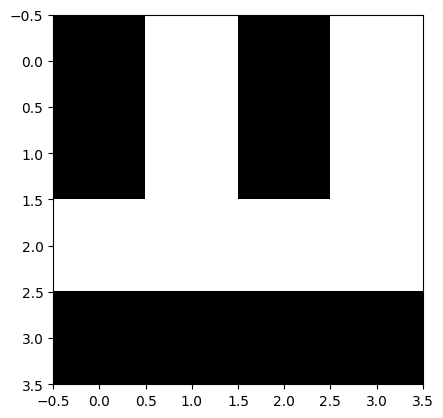

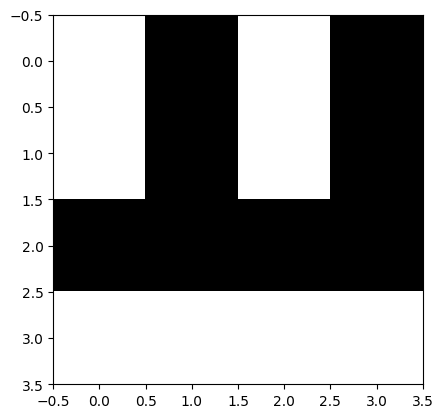

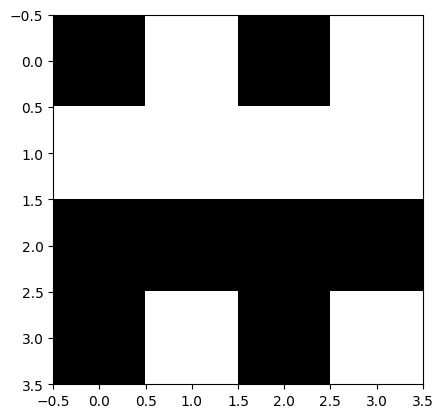

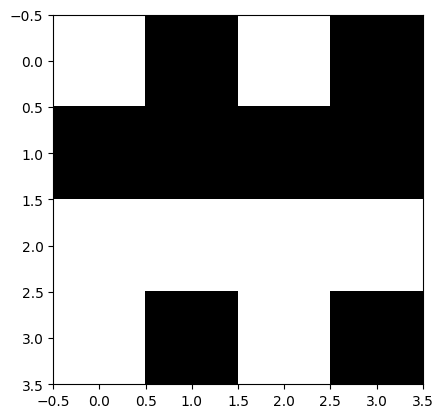

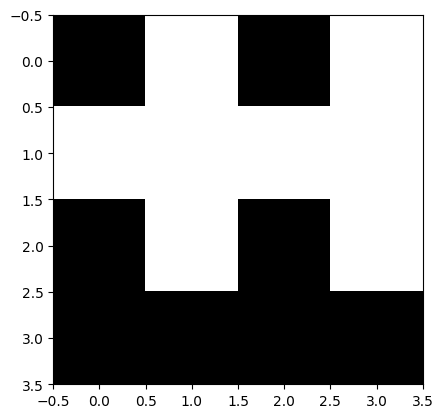

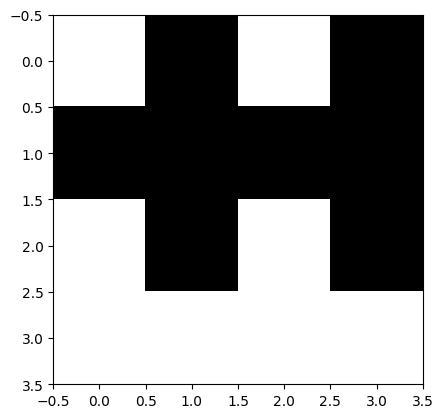

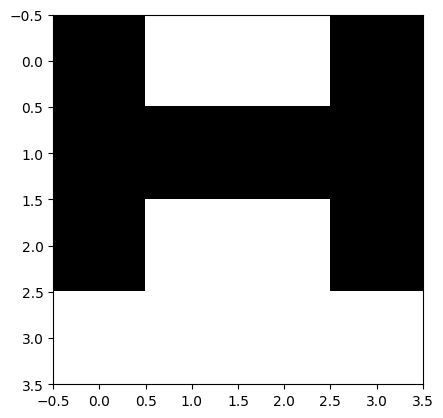

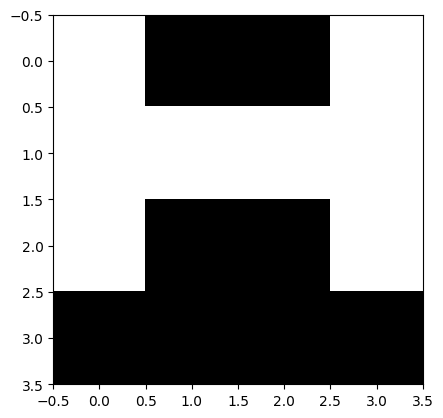

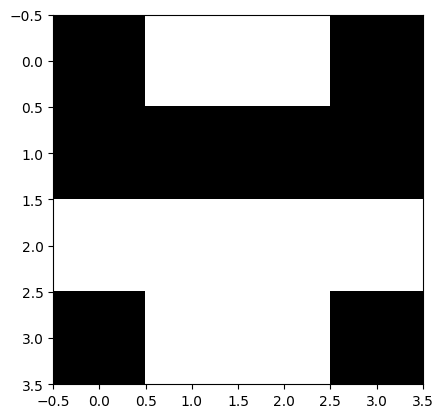

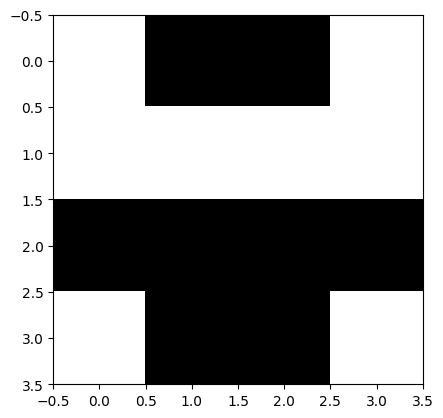

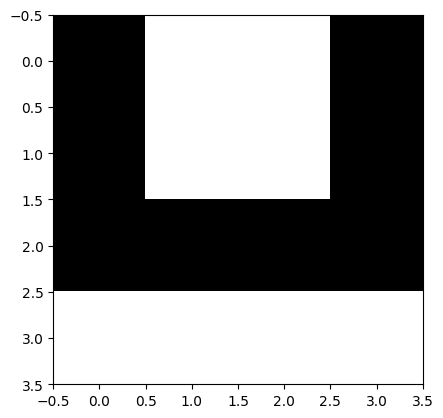

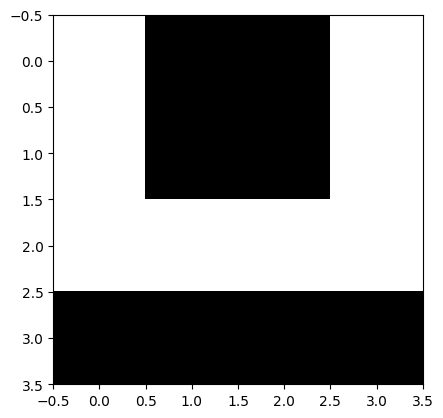

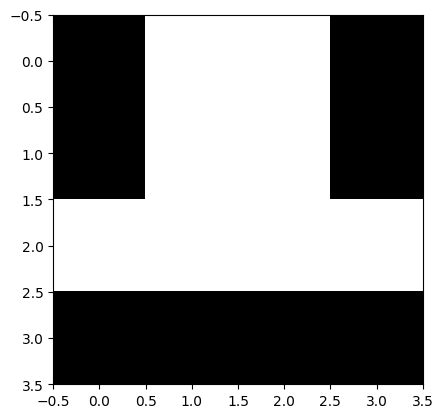

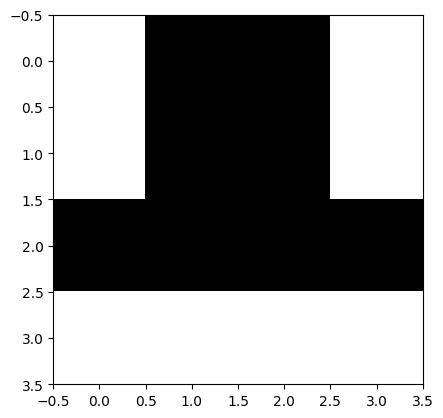

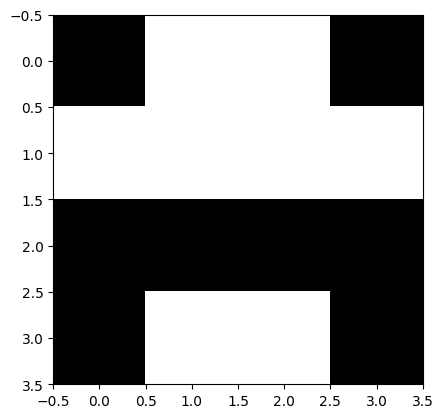

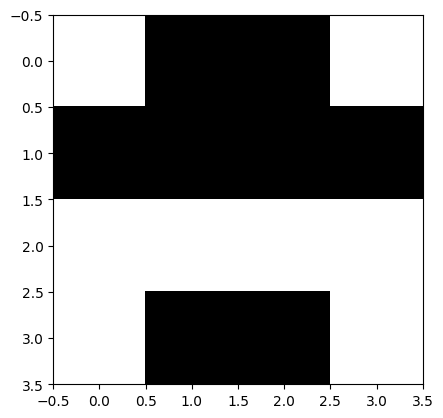

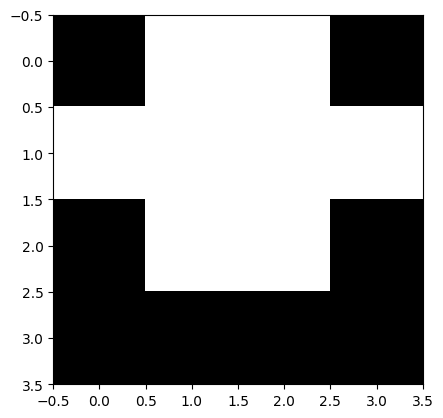

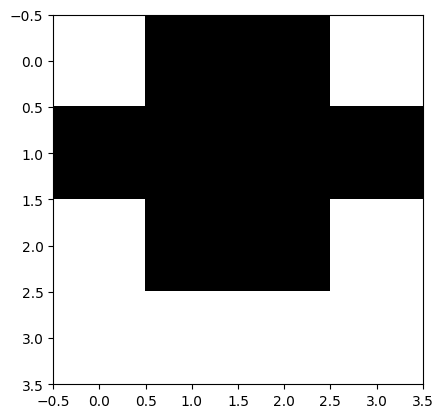

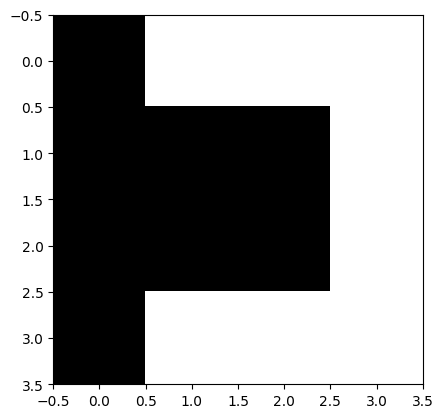

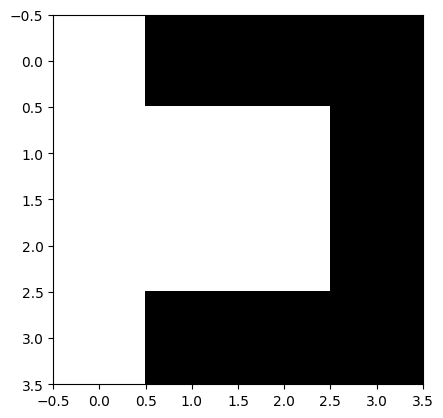

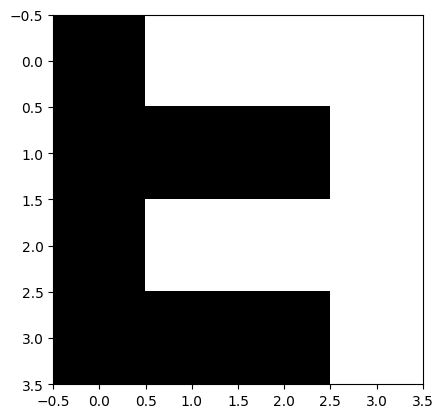

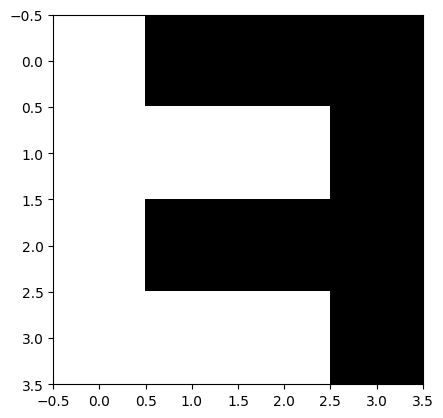

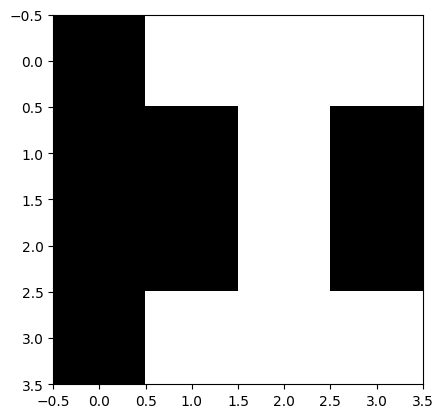

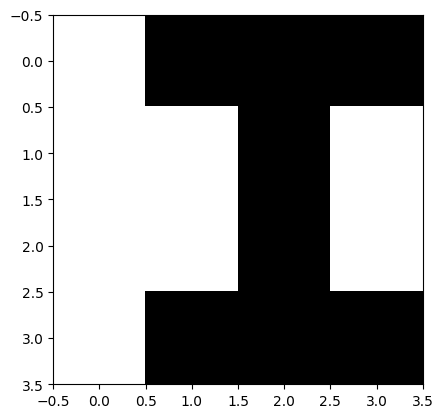

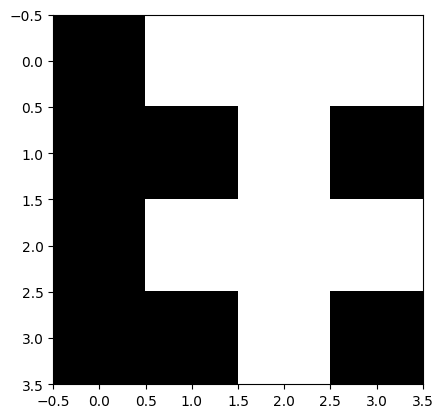

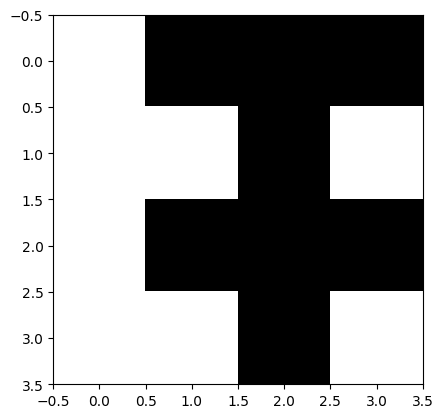

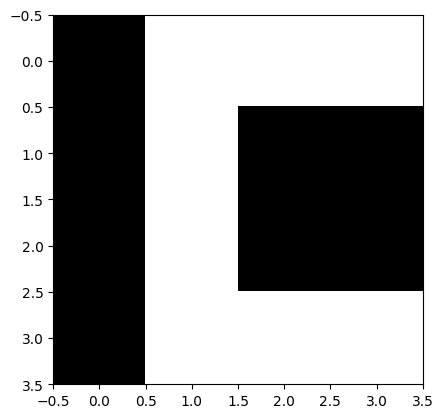

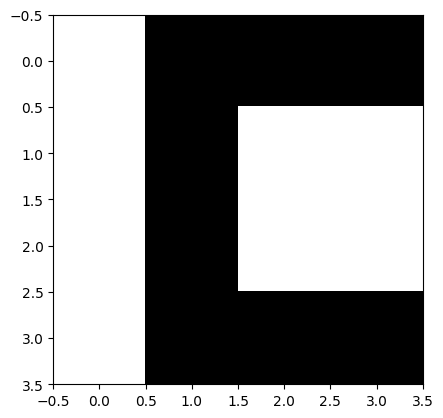

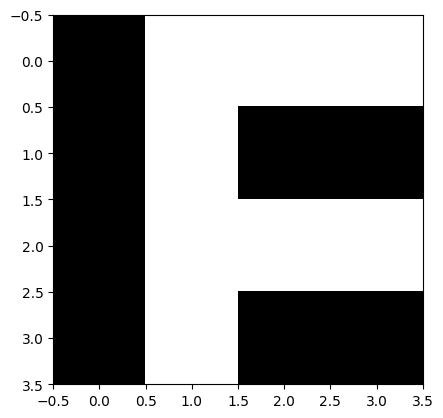

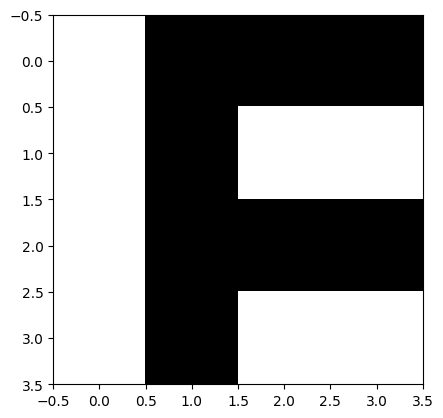

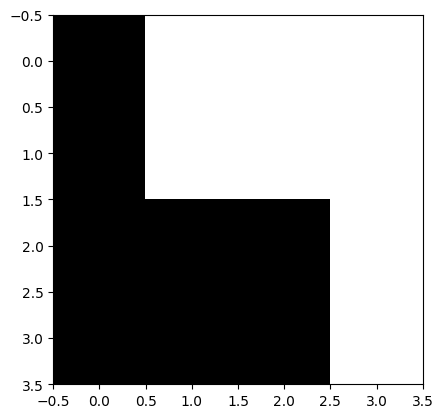

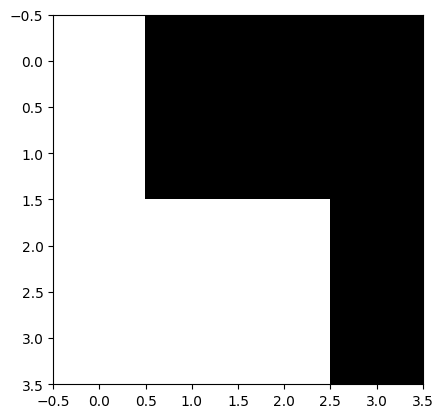

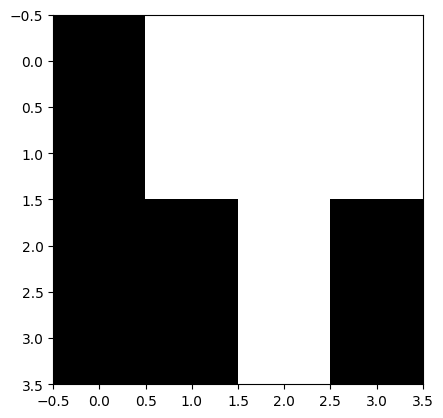

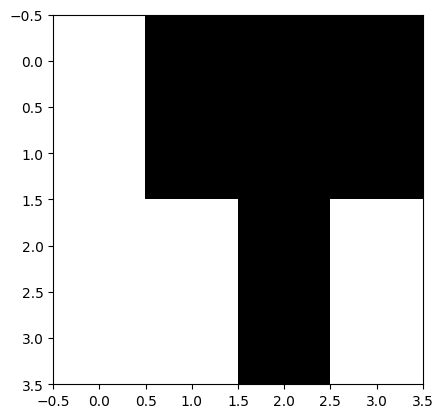

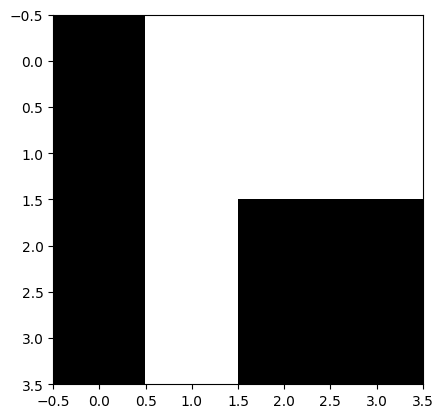

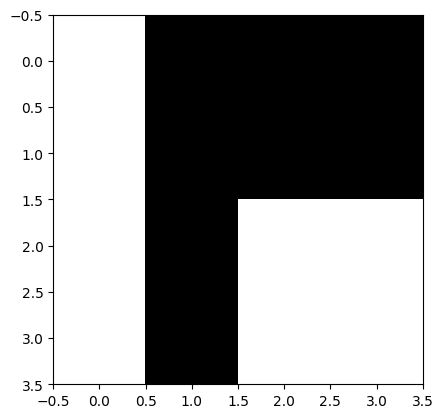

In [8]:
for protocol in povm_tetra.lowest_measures:
    plot_protocol(protocol.protocol)
    
    plt.show()